# Matrix element LM plotting routines demo

28/11/19

Source [notebook on Github](https://github.com/phockett/ePSproc/blob/master/epsproc/tests/ePSproc_demo_matE_plotting_Nov2019.ipynb).

## Basic IO

In [1]:
import sys
import os
import time
import numpy as np

# For module testing, include path to module here
modPath = r'D:\code\github\ePSproc'
# modPath = r'/home/femtolab/github/ePSproc/'
sys.path.append(modPath)
import epsproc as ep

* pyevtk not found, VTK export not available. 


In [2]:
# Load data from modPath\data
dataPath = os.path.join(modPath, 'data', 'photoionization')
dataFile = os.path.join(dataPath, 'n2_3sg_0.1-50.1eV_A2.inp.out')  # Set for sample N2 data for testing

# Scan data dir
dataSet = ep.readMatEle(fileBase = dataPath)  

*** ePSproc readMatEle(): scanning files for DumpIdy segments.

*** Scanning dir
D:\code\github\ePSproc\data\photoionization
Found 2 .out file(s)


*** Reading ePS output file:  D:\code\github\ePSproc\data\photoionization\n2_3sg_0.1-50.1eV_A2.inp.out
Expecting 51 energy points.
Expecting 2 symmetries.
Scanning CrossSection segments.
Expecting 102 DumpIdy segments.
Found 102 dumpIdy segments (sets of matrix elements).

Processing segments to Xarrays...
Processed 102 sets of DumpIdy file segments, (0 blank)

*** Reading ePS output file:  D:\code\github\ePSproc\data\photoionization\no2_demo_ePS.out
Expecting 1 energy points.
Expecting 3 symmetries.
Scanning CrossSection segments.
Expecting 3 DumpIdy segments.
Found 3 dumpIdy segments (sets of matrix elements).

Processing segments to Xarrays...
Processed 3 sets of DumpIdy file segments, (0 blank)


## Basic plotting

As shown in the [basic demo notebook](https://epsproc.readthedocs.io/en/latest/ePSproc_demo_Aug2019/ePSproc_demo_Aug2019.html), basic plotting with Xarray functionality is a quick and easy way to plot matrix elements.

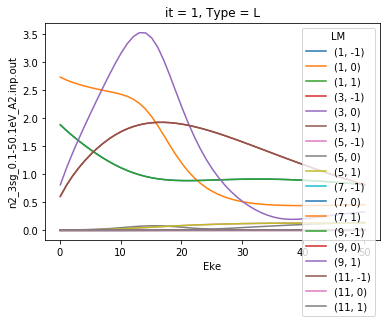

In [3]:
# Plot matrix elements using Xarray functionality
daPlot = dataSet[0].sum('mu').sum('Sym').sel({'Type':'L'}).squeeze()
daPlot.pipe(np.abs).plot.line(x='Eke');

For more control, additional preprocessing with thresholding & selection can be used.

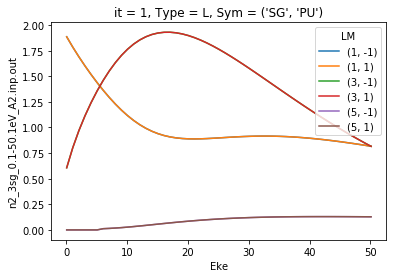

In [4]:
selDims = {'Type':'L','Cont':'PU'}
daPlot = ep.matEleSelector(dataSet[0], thres=1e-2, inds = selDims, sq = True)
daPlot.pipe(np.abs).sum('mu').plot.line(x='Eke');

... or faceting ...

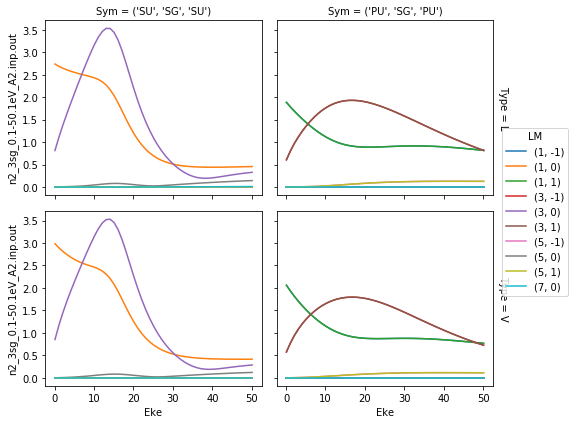

In [5]:
# Plot with faceting on symmetry
daPlot = ep.matEleSelector(dataSet[0], thres=1e-2, dims = 'Eke', sq = True).sum('mu').squeeze()
daPlot.pipe(np.abs).plot.line(x='Eke', col='Sym', row='Type');

## Plotting maps with lmPlot

For complex multidimensional cases line plots get busy, quickly.  A nice alternative is provided by [Seaborn's Clustermap](https://seaborn.pydata.org/examples/structured_heatmap.html), which produces a 2D map of values (i.e. a heatmap or image), with additional dimensional information as a side-bar.  This is now implemented in `ep.lmPlot()`.

Plotting data n2_3sg_0.1-50.1eV_A2.inp.out, pType=a, thres=0.01, with Seaborn


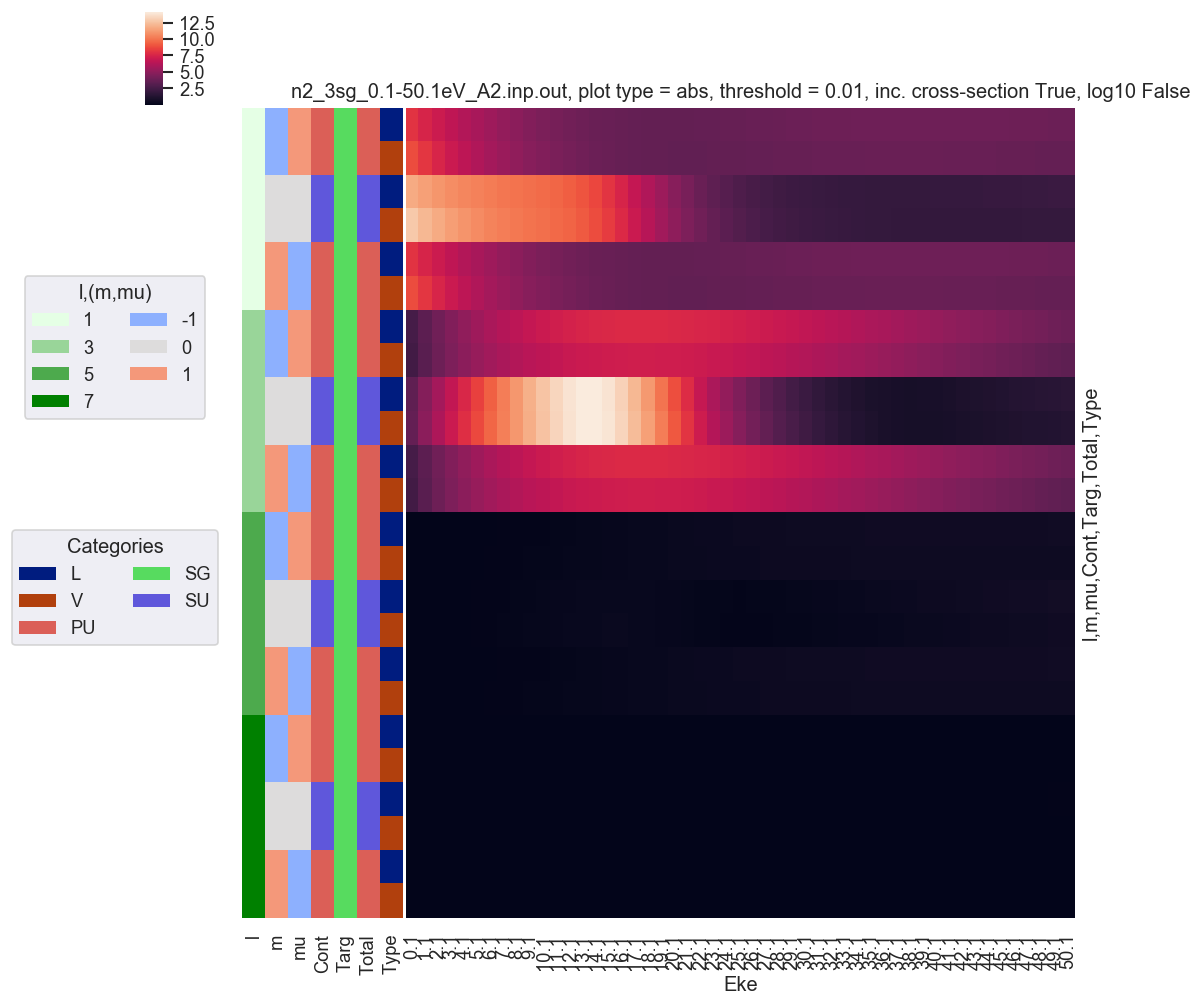

In [6]:
# Plot with sensible defaults - all dims
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(dataSet[0])

In order to use Seaborn, the data is converted from a multidimensional Xarray to a 2D Pandas array.  This displays nicely in Jupyter, so is also handy for inspecting values.

In [7]:
daPlotpd

Eke                                0.1        1.1        2.1        3.1   \
l m  mu Cont Targ Total Type                                               
1 -1  1 PU   SG   PU    L      8.143443   7.593716   7.103404   6.660060   
                        V      8.900023   8.224738   7.627702   7.095200   
   0  0 SU   SG   SU    L     11.823354  11.429458  11.111935  10.849149   
                        V     12.883046  12.311423  11.824577  11.410811   
   1 -1 PU   SG   PU    L      8.143443   7.593716   7.103404   6.660060   
                        V      8.900023   8.224738   7.627702   7.095200   
3 -1  1 PU   SG   PU    L      2.620714   3.416440   4.071325   4.629875   
                        V      2.484140   3.291182   3.949586   4.494447   
   0  0 SU   SG   SU    L      3.513428   4.719556   5.785863   6.766306   
                        V      3.682143   4.976274   6.086735   7.067816   
   1 -1 PU   SG   PU    L      2.620714   3.416440   4.071325   4.629875   
                        V      2.484140   3.291182   3.949586   4.494447   
5 -1  1 PU   SG   PU    L      0.003993   0.013835   0.021033   0.026999   
                        V      0.002819   0.010751   0.017869   0.026216   
   0  0 SU   SG   SU    L      0.006473   0.021244   0.032261   0.041993   
                        V      0.005091   0.017458   0.027707   0.039802   
   1 -1 PU   SG   PU    L      0.003993   0.013835   0.021033   0.026999   
                        V      0.002819   0.010751   0.017869   0.026216   
7 -1  1 PU   SG   PU    L      0.000024   0.000158   0.000305   0.000394   
                        V      0.000025   0.000150   0.000266   0.000318   
   0  0 SU   SG   SU    L      0.000020   0.000145   0.000292   0.000373   
                        V      0.000022   0.000137   0.000240   0.000265   
   1 -1 PU   SG   PU    L      0.000024   0.000158   0.000305   0.000394   
                        V      0.000025   0.000150   0.000266   0.000318   

Eke                                4.1        5.1        6.1        7.1   \
l m  mu Cont Targ Total Type                                               
1 -1  1 PU   SG   PU    L      6.255712   5.885550   5.546815   5.238038   
                        V      6.617558   6.187859   5.801034   5.453317   
   0  0 SU   SG   SU    L     10.627257  10.437825  10.275304  10.134910   
                        V     11.061133  10.768451  10.526367  10.328033   
   1 -1 PU   SG   PU    L      6.255712   5.885550   5.546815   5.238038   
                        V      6.617558   6.187859   5.801034   5.453317   
3 -1  1 PU   SG   PU    L      5.118714   5.553100   5.941282   6.287526   
                        V      4.953052   5.345025   5.683818   5.978440   
   0  0 SU   SG   SU    L      7.695465   8.593950   9.472654  10.335015   
                        V      7.963633   8.806609   9.618839  10.413320   
   1 -1 PU   SG   PU    L      5.118714   5.553100   5.941282   6.287526   
                        V      4.953052   5.345025   5.683818   5.978440   
5 -1  1 PU   SG   PU    L      0.033004   0.039974   0.048709   0.059861   
                        V      0.036675   0.049162   0.063460   0.079409   
   0  0 SU   SG   SU    L      0.052580   0.065454   0.081763   0.102433   
                        V      0.055471   0.074663   0.097135   0.122785   
   1 -1 PU   SG   PU    L      0.033004   0.039974   0.048709   0.059861   
                        V      0.036675   0.049162   0.063460   0.079409   
7 -1  1 PU   SG   PU    L      0.000405   0.000362   0.000320   0.000354   
                        V      0.000325   0.000356   0.000461   0.000630   
   0  0 SU   SG   SU    L      0.000355   0.000266   0.000224   0.000373   
                        V      0.000252   0.000340   0.000552   0.000822   
   1 -1 PU   SG   PU    L      0.000405   0.000362   0.000320   0.000354   
                        V      0.000325   0.000356   0.000461   0.000630   

Eke                                8.1        

In [8]:
# With slicing by index (dims, energy)
daPlotpd.iloc[0:6, 0:6]

Eke                                 0.1        1.1        2.1        3.1  \
l m  mu Cont Targ Total Type                                               
1 -1  1 PU   SG   PU    L      8.143443   7.593716   7.103404   6.660060   
                        V      8.900023   8.224738   7.627702   7.095200   
   0  0 SU   SG   SU    L     11.823354  11.429458  11.111935  10.849149   
                        V     12.883046  12.311423  11.824577  11.410811   
   1 -1 PU   SG   PU    L      8.143443   7.593716   7.103404   6.660060   
                        V      8.900023   8.224738   7.627702   7.095200   

Eke                                 4.1        5.1  
l m  mu Cont Targ Total Type                        
1 -1  1 PU   SG   PU    L      6.255712   5.885550  
                        V      6.617558   6.187859  
   0  0 SU   SG   SU    L     10.627257  10.437825  
                        V     11.061133  10.768451  
   1 -1 PU   SG   PU    L      6.255712   5.885550  
                        V      6.617558   6.187859

### Examples...

Various settings can be passed for more control over the plot.

**Example with**
- Selection on Type = L
- Thresholding type by % of max value
- Log10 scaling
- Extended figure size


Plotting data n2_3sg_0.1-50.1eV_A2.inp.out, pType=a, thres=0.08224737585639882, with Seaborn


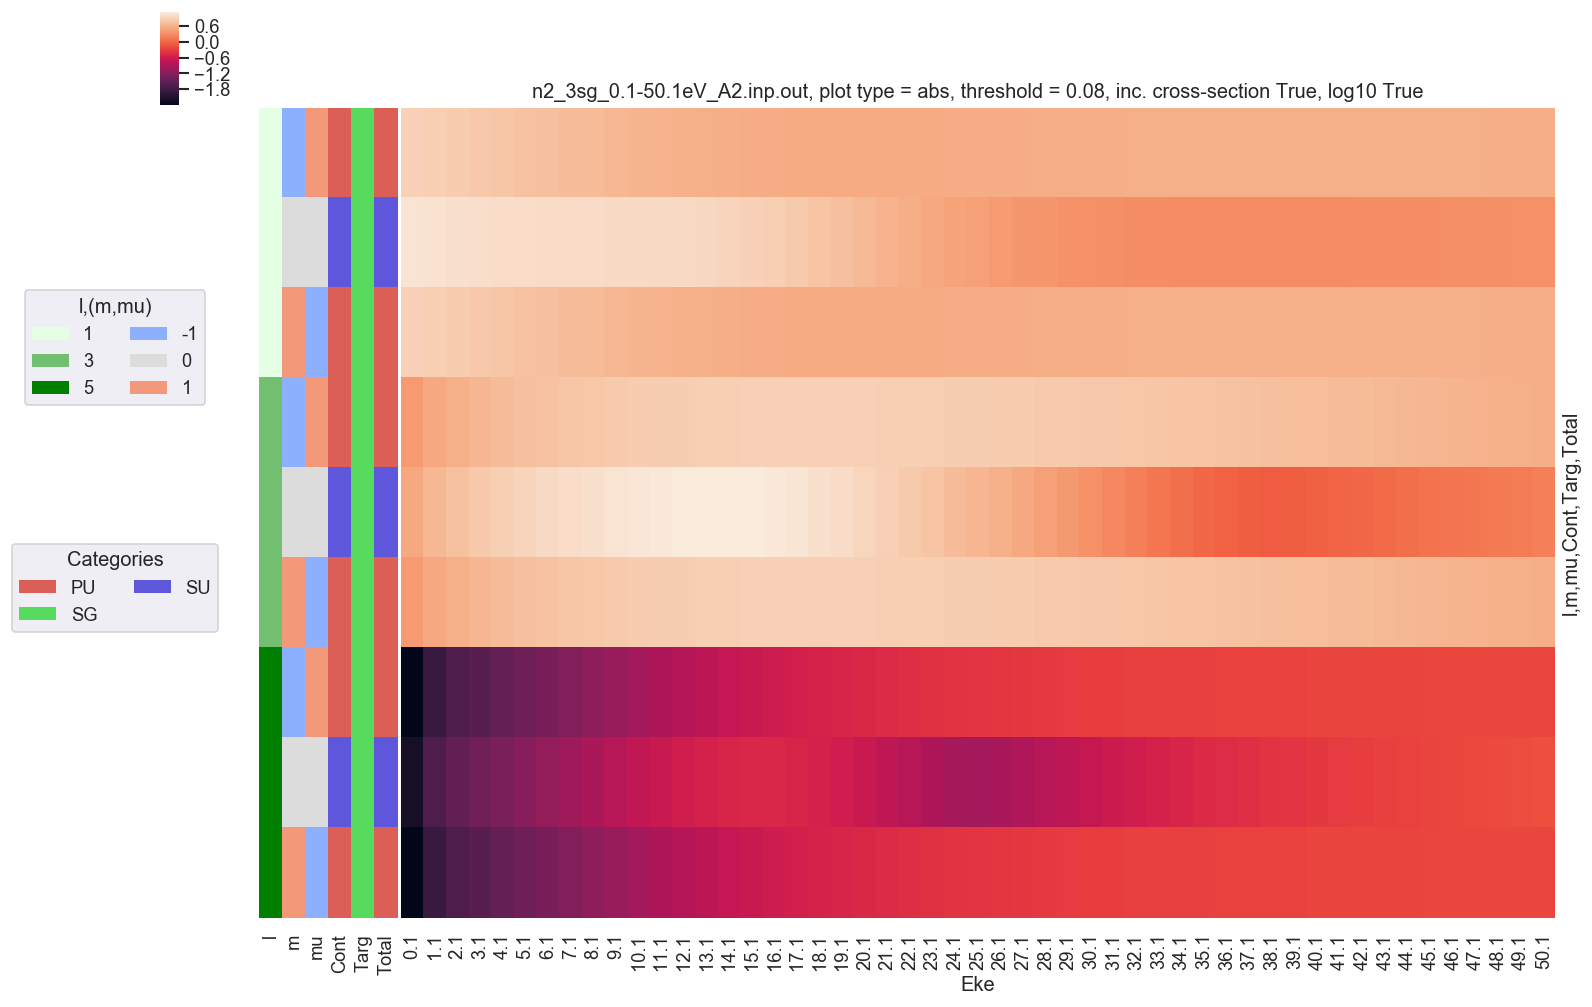

In [9]:
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(dataSet[0], selDims = {'Type':'L'}, 
                                               plotDims = ('l','m','mu','Cont','Targ','Total'), 
                                               thresType='pc', thres = 0.01, figsize = (15,10), logFlag = True)

---
**Example with**
- Selection on Type = L
- Sum over mu
- Thresholding type by % of max value
- Log10 scaling
- Extended figure size


Plotting data n2_3sg_0.1-50.1eV_A2.inp.out, pType=a, thres=0.08224737585639882, with Seaborn


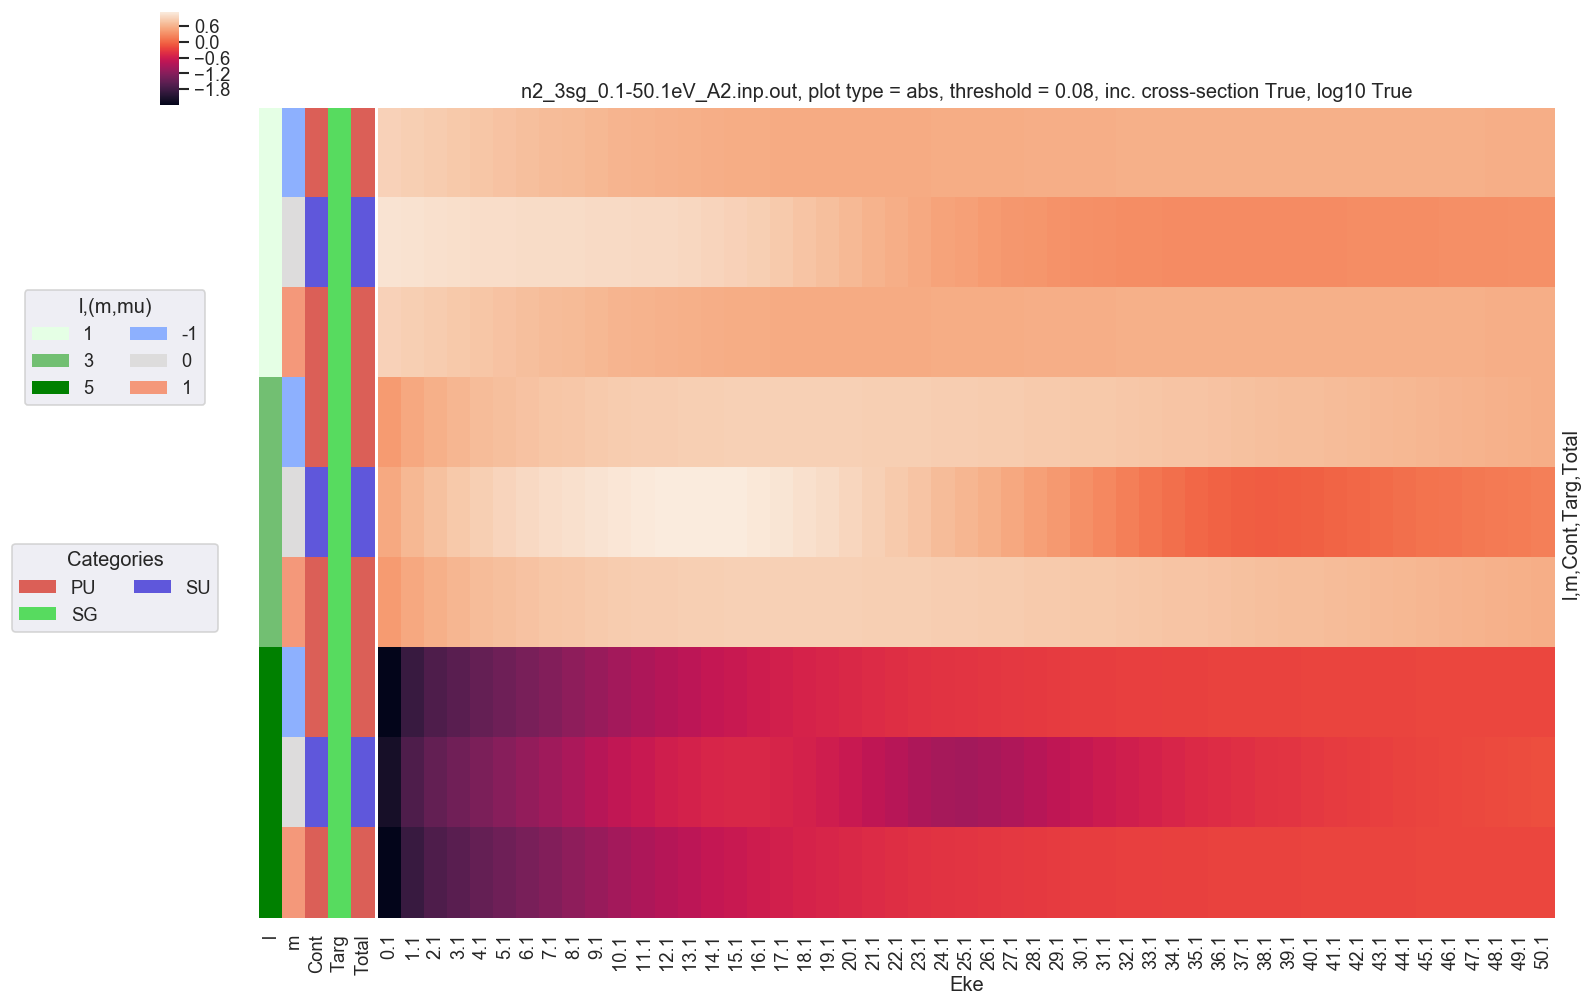

In [10]:
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(dataSet[0], selDims = {'Type':'L'}, sumDims = ['mu'],
                                               plotDims = ('l','m','Cont','Targ','Total'), 
                                               thresType='pc', thres = 0.01, figsize = (15,10), logFlag = True)

---
**Example with**
- Selection on Type = L
- Sum over mu and Sym
- Thresholding type by % of max value
- Log10 scaling
- Extended figure size


Plotting data n2_3sg_0.1-50.1eV_A2.inp.out, pType=a, thres=0.08224737585639882, with Seaborn


No handles with labels found to put in legend.


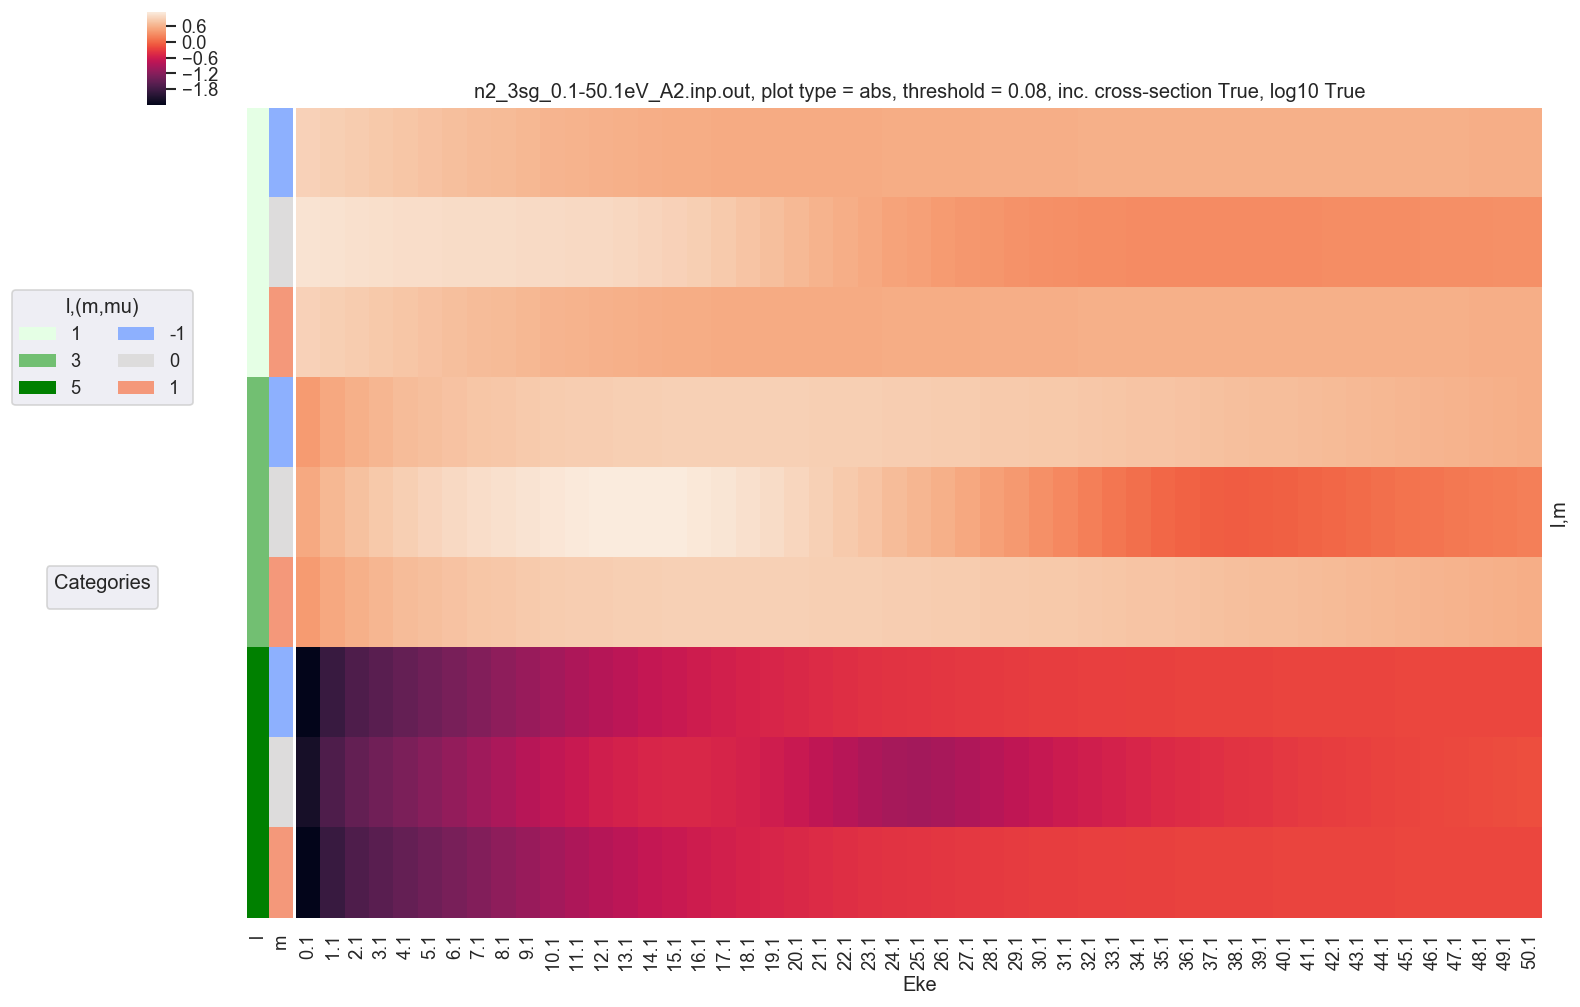

In [11]:
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(dataSet[0], selDims = {'Type':'L'}, sumDims = ['mu', 'Sym'],
                                               plotDims = ('l','m'), 
                                               thresType='pc', thres = 0.01, figsize = (15,10), logFlag = True)

---
**Example with**
- Changing the ordering of plotDims, here with 'm' as the main index.

Plotting data n2_3sg_0.1-50.1eV_A2.inp.out, pType=a, thres=0.08224737585639882, with Seaborn


No handles with labels found to put in legend.


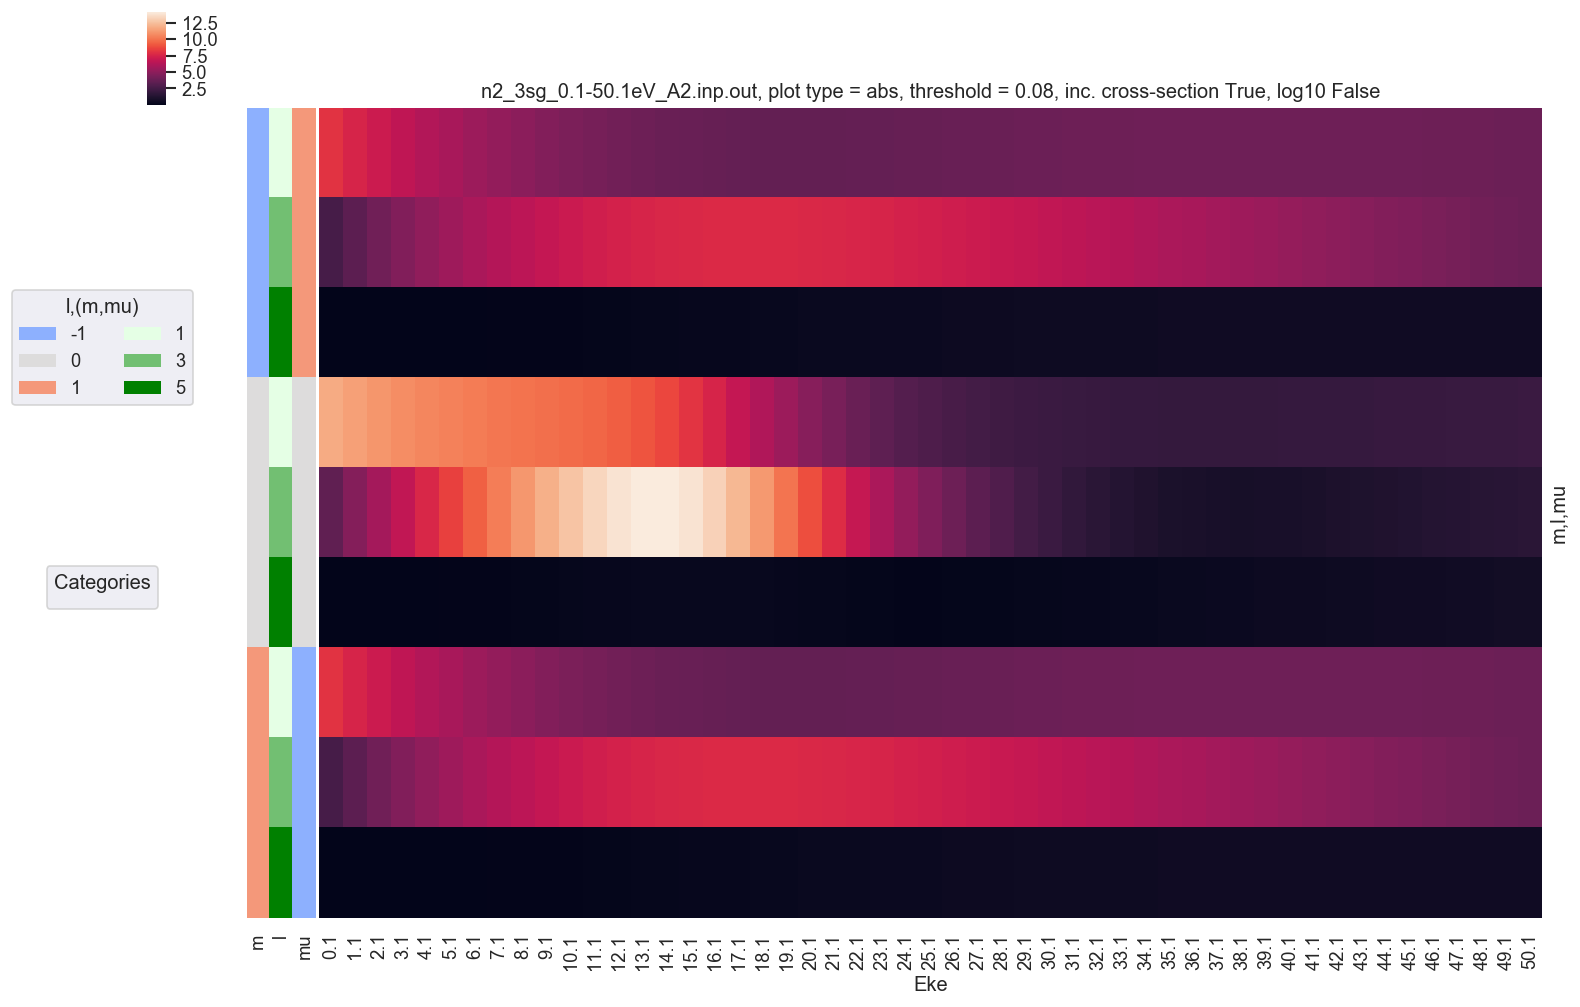

In [12]:
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(dataSet[0], selDims = {'Type':'L'}, sumDims = ['Sym'],
                                               plotDims = ('m','l','mu'), 
                                               thresType='pc', thres = 0.01, figsize = (15,10))

---
**Example with**
- Ordering by symmetry group.

Plotting data n2_3sg_0.1-50.1eV_A2.inp.out, pType=a, thres=0.08224737585639882, with Seaborn


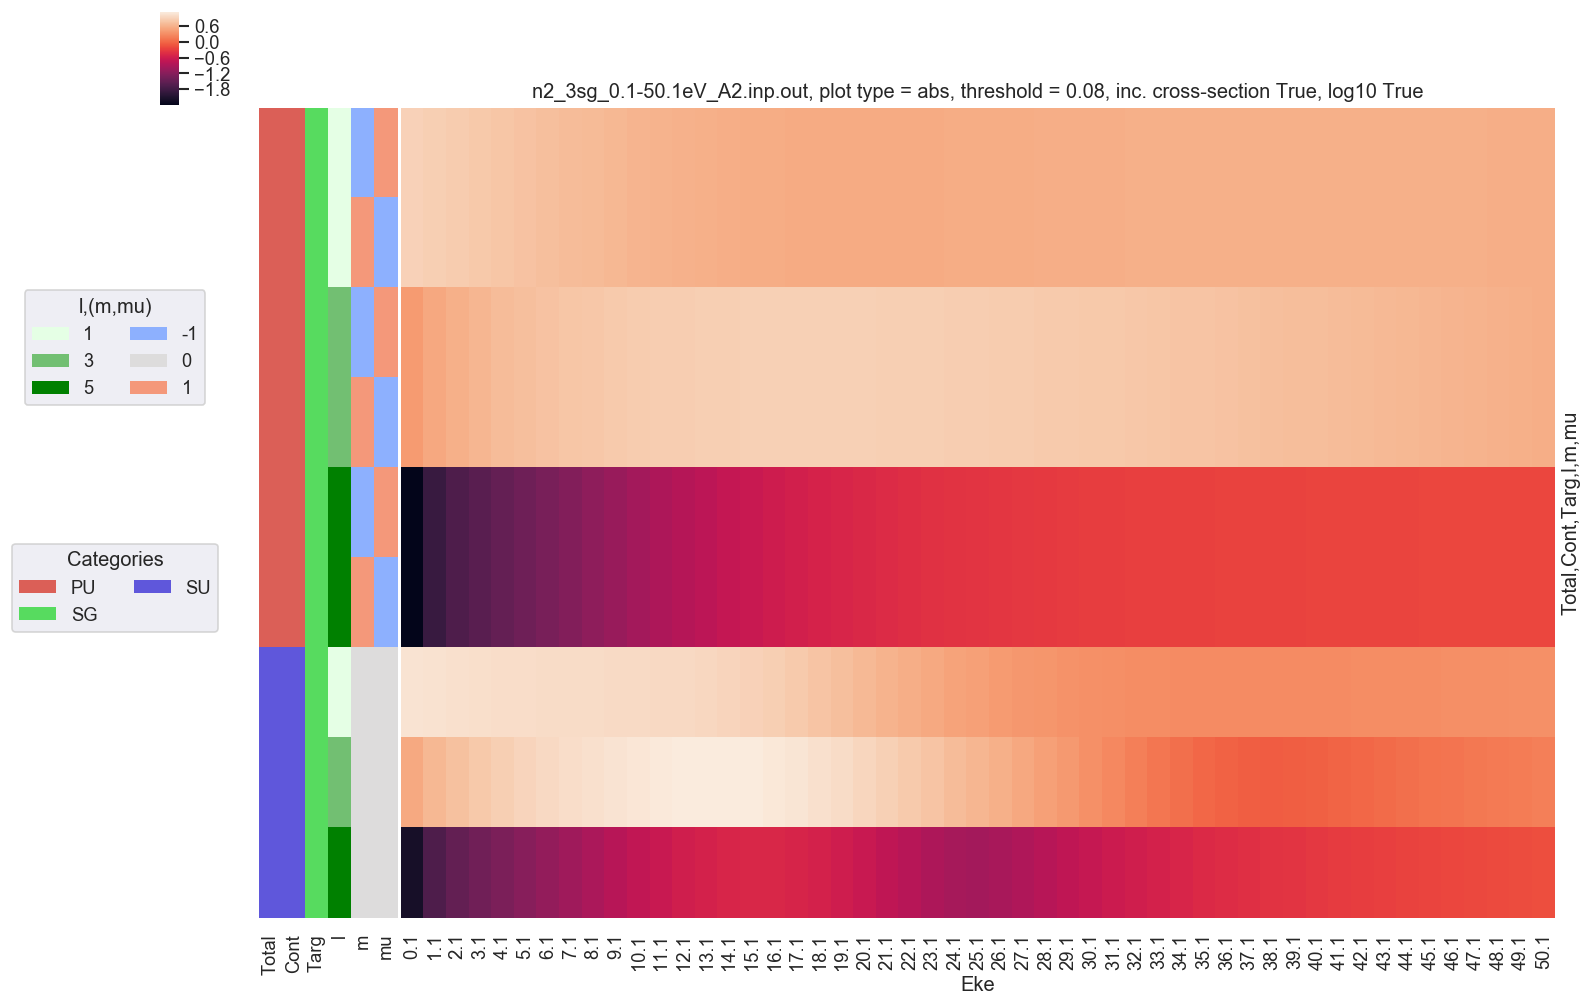

In [13]:
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(dataSet[0], selDims = {'Type':'L'},
                                               plotDims = ('Total','Cont','Targ','l','m','mu'), 
                                               thresType='pc', thres = 0.01, figsize = (15,10), logFlag = True)

---
**Example with**
- Unwrapped phase plot

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\ePSdev\lib\site-packages\numpy\lib\function_base.py:1519: RuntimeWarning:

invalid value encountered in remainder

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\ePSdev\lib\site-packages\numpy\lib\function_base.py:1520: RuntimeWarning:

invalid value encountered in greater

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\ePSdev\lib\site-packages\numpy\lib\function_base.py:1522: RuntimeWarning:

invalid value encountered in less



Plotting data n2_3sg_0.1-50.1eV_A2.inp.out, pType=phaseUW, thres=0.5, with Seaborn


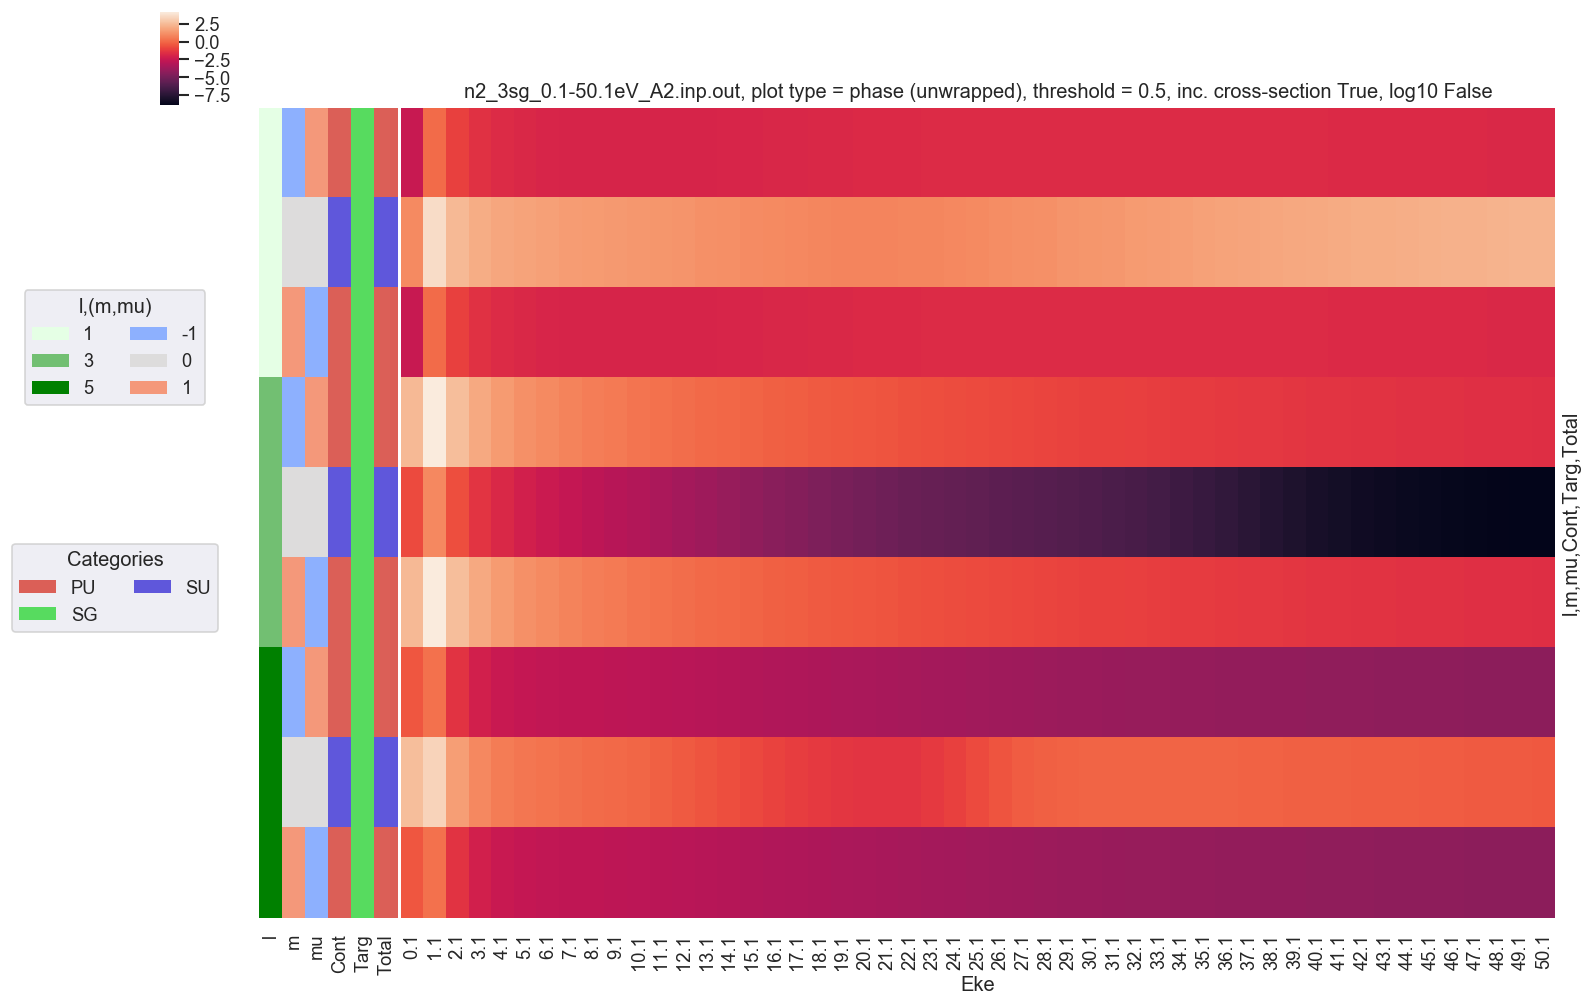

In [14]:
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(dataSet[0], selDims = {'Type':'L'}, 
                                               plotDims = ('l','m','mu','Cont','Targ','Total'), 
                                               thres = 0.5, figsize = (15,10), 
                                               pType = 'phaseUW')

## Further analysis examples

### Summations
- Sum over Eke, plot by l.

Plotting data n2_3sg_0.1-50.1eV_A2.inp.out, pType=a, thres=0.08224737585639882, with Seaborn


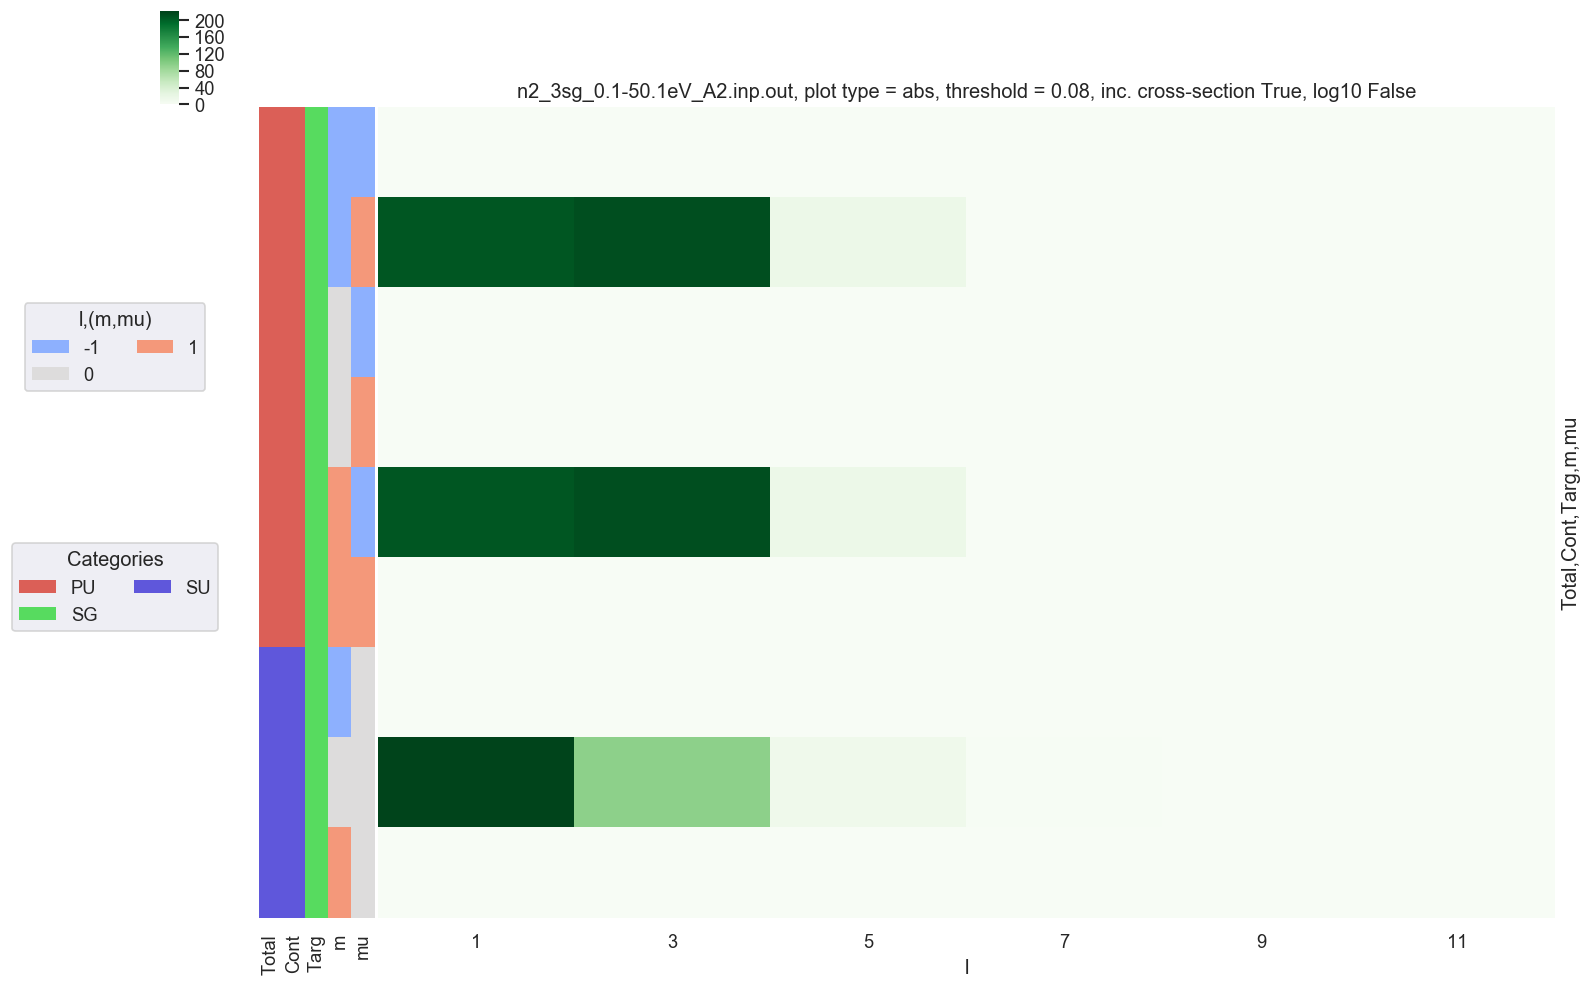

In [15]:
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(dataSet[0], selDims = {'Type':'L'}, xDim = 'LM', sumDims = 'Eke',
                                               plotDims = ('Total','Cont','Targ','m','mu'), 
                                               thresType='pc', thres = 0.01, figsize = (15,10),
                                               cmap = 'Greens')

In [16]:
daPlotpd

l                              1           3          5         7         9   \
Total Cont Targ m  mu                                                          
PU    PU   SG   -1 -1    0.000000    0.000000   0.000000  0.000000  0.000000   
                    1  207.905550  212.622228  17.570951  0.779478  0.020871   
                 0 -1    0.000000    0.000000   0.000000  0.000000  0.000000   
                    1    0.000000    0.000000   0.000000  0.000000  0.000000   
                 1 -1  207.905550  212.622228  17.570951  0.779478  0.020871   
                    1    0.000000    0.000000   0.000000  0.000000  0.000000   
SU    SU   SG   -1  0    0.000000    0.000000   0.000000  0.000000  0.000000   
                 0  0  220.297545   95.032282  13.737638  0.950270  0.026699   
                 1  0    0.000000    0.000000   0.000000  0.000000  0.000000   

l                            11  
Total Cont Targ m  mu            
PU    PU   SG   -1 -1  0.000000  
                    1  0.000572  
                 0 -1  0.000000  
                    1  0.000000  
                 1 -1  0.000572  
                    1  0.000000  
SU    SU   SG   -1  0  0.000000  
                 0  0  0.000313  
                 1  0  0.000000

### Correlations
- Correlation plots from the Pandas representation with [`pandas.corr()`](https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html#correlation). This defaults to a Pearson correlation coefficient, but other types of correlation functions can be used. *Work in progress!*

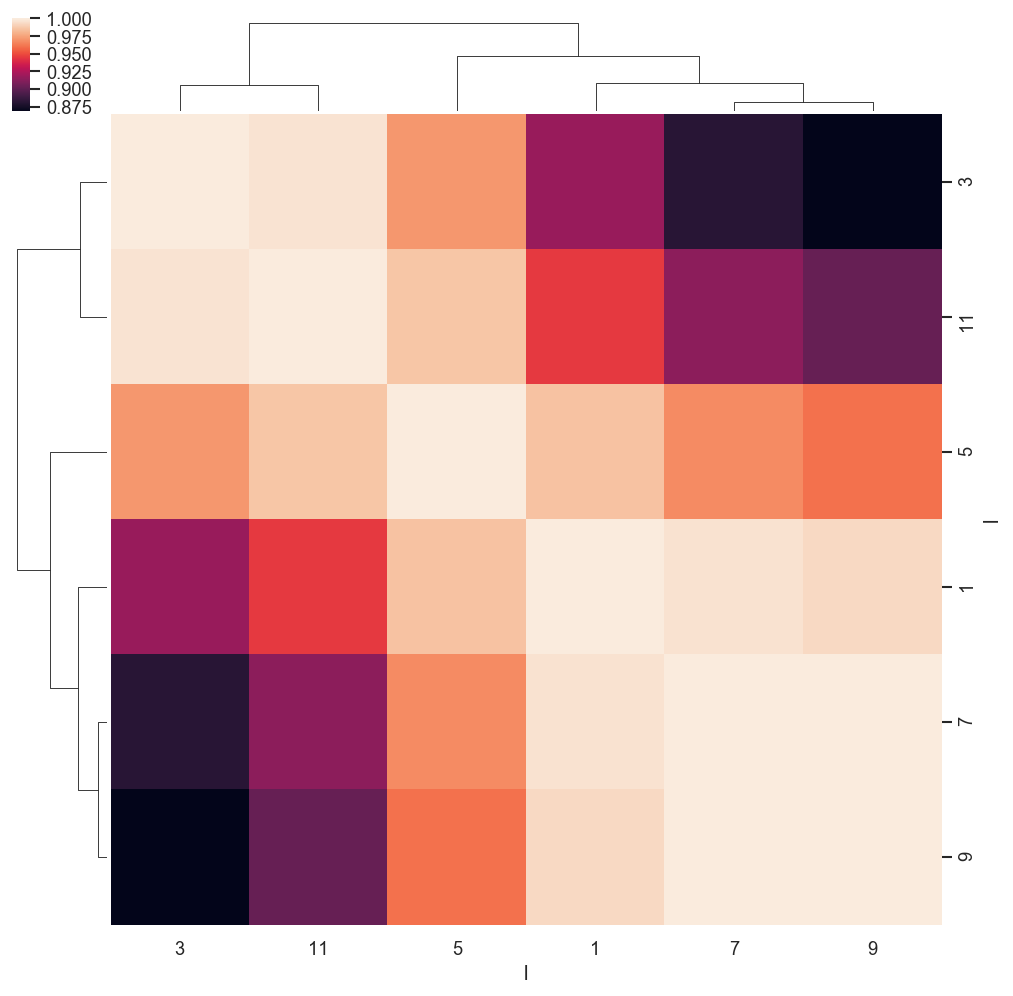

In [17]:
ep.snsMatMod.clustermap(daPlotpd.corr())

---
- Sum over symetries, plot by Eke.

Plotting data n2_3sg_0.1-50.1eV_A2.inp.out, pType=a, thres=0.08224737585639882, with Seaborn


No handles with labels found to put in legend.


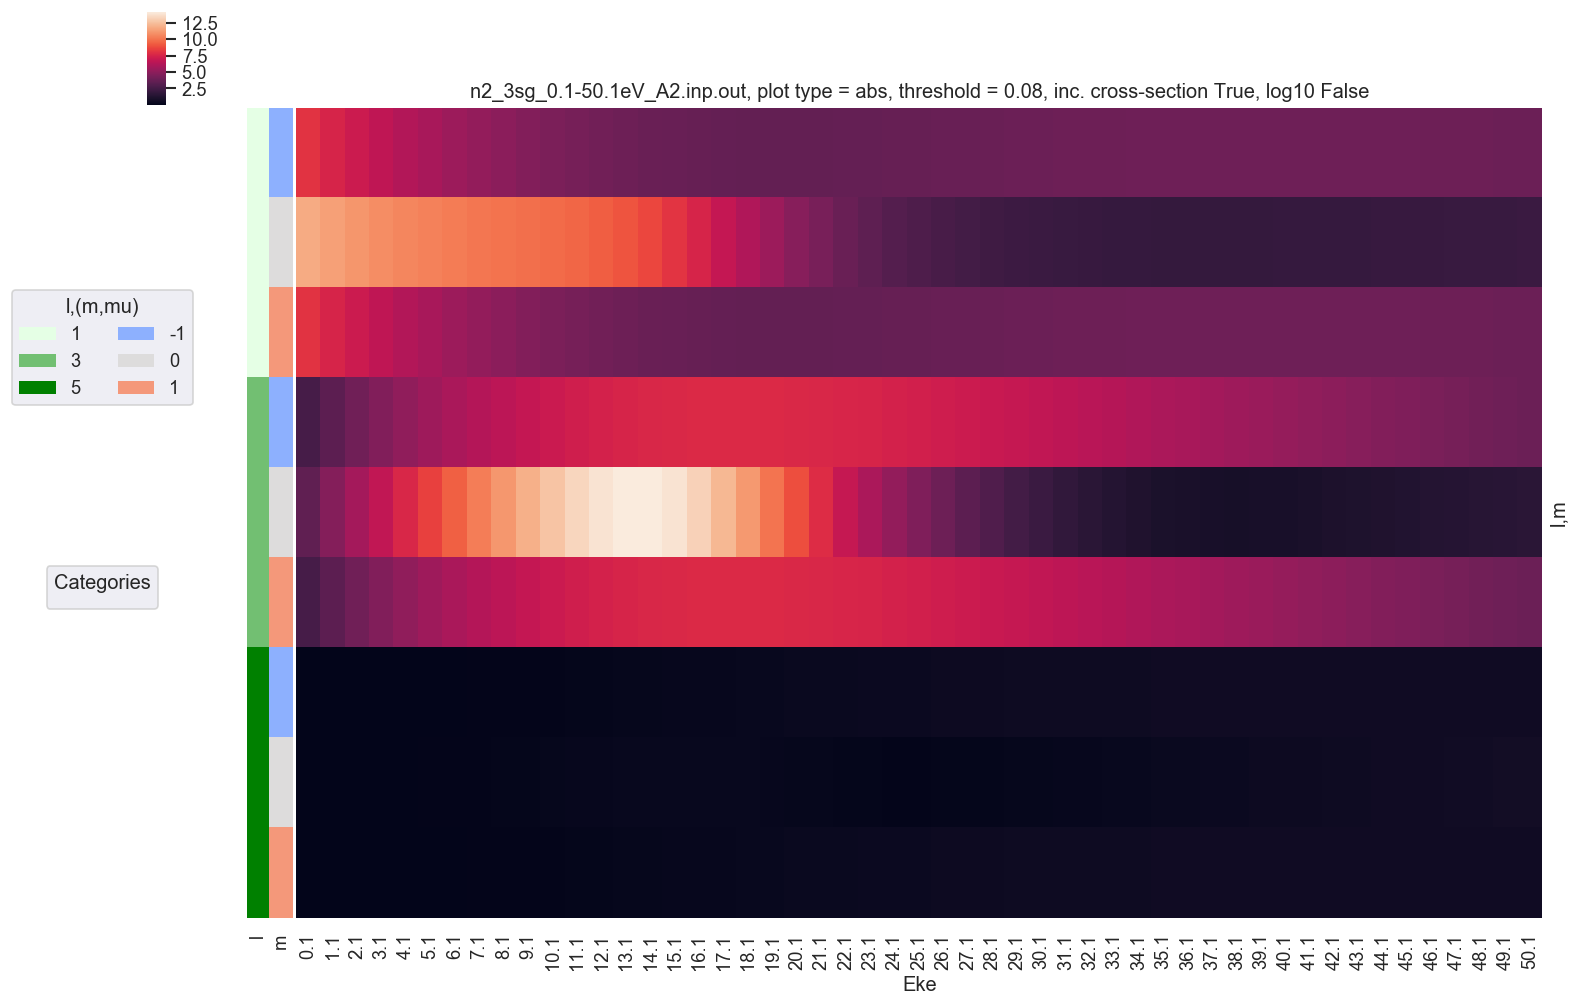

In [18]:
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(dataSet[0], selDims = {'Type':'L'}, sumDims = ['mu', 'Sym'],
                                               plotDims = ('l','m'), 
                                               thresType='pc', thres = 0.01, figsize = (15,10))

In [19]:
# Display values for first 10 Ekes
daPlotpd.iloc[:,0:11]

Eke        0.1        1.1        2.1        3.1        4.1        5.1   \
l m                                                                      
1 -1   8.143443   7.593716   7.103404   6.660060   6.255712   5.885550   
   0  11.823354  11.429458  11.111935  10.849149  10.627257  10.437825   
   1   8.143443   7.593716   7.103404   6.660060   6.255712   5.885550   
3 -1   2.620714   3.416440   4.071325   4.629875   5.118714   5.553100   
   0   3.513428   4.719556   5.785863   6.766306   7.695465   8.593950   
   1   2.620714   3.416440   4.071325   4.629875   5.118714   5.553100   
5 -1   0.003993   0.013835   0.021033   0.026999   0.033004   0.039974   
   0   0.006473   0.021244   0.032261   0.041993   0.052580   0.065454   
   1   0.003993   0.013835   0.021033   0.026999   0.033004   0.039974   

Eke        6.1        7.1        8.1        9.1        10.1  
l m                                                          
1 -1   5.546815   5.238038   4.958515   4.707928   4.486077  
   0  10.275304  10.134910  10.010680   9.893534   9.769350  
   1   5.546815   5.238038   4.958515   4.707928   4.486077  
3 -1   5.941282   6.287526   6.594077   6.862346   7.093572  
   0   9.472654  10.335015  11.177359  11.987428  12.741400  
   1   5.941282   6.287526   6.594077   6.862346   7.093572  
5 -1   0.048709   0.059861   0.073792   0.090524   0.109801  
   0   0.081763   0.102433   0.127951   0.158158   0.192134  
   1   0.048709   0.059861   0.073792   0.090524   0.109801

---
- Correlations...

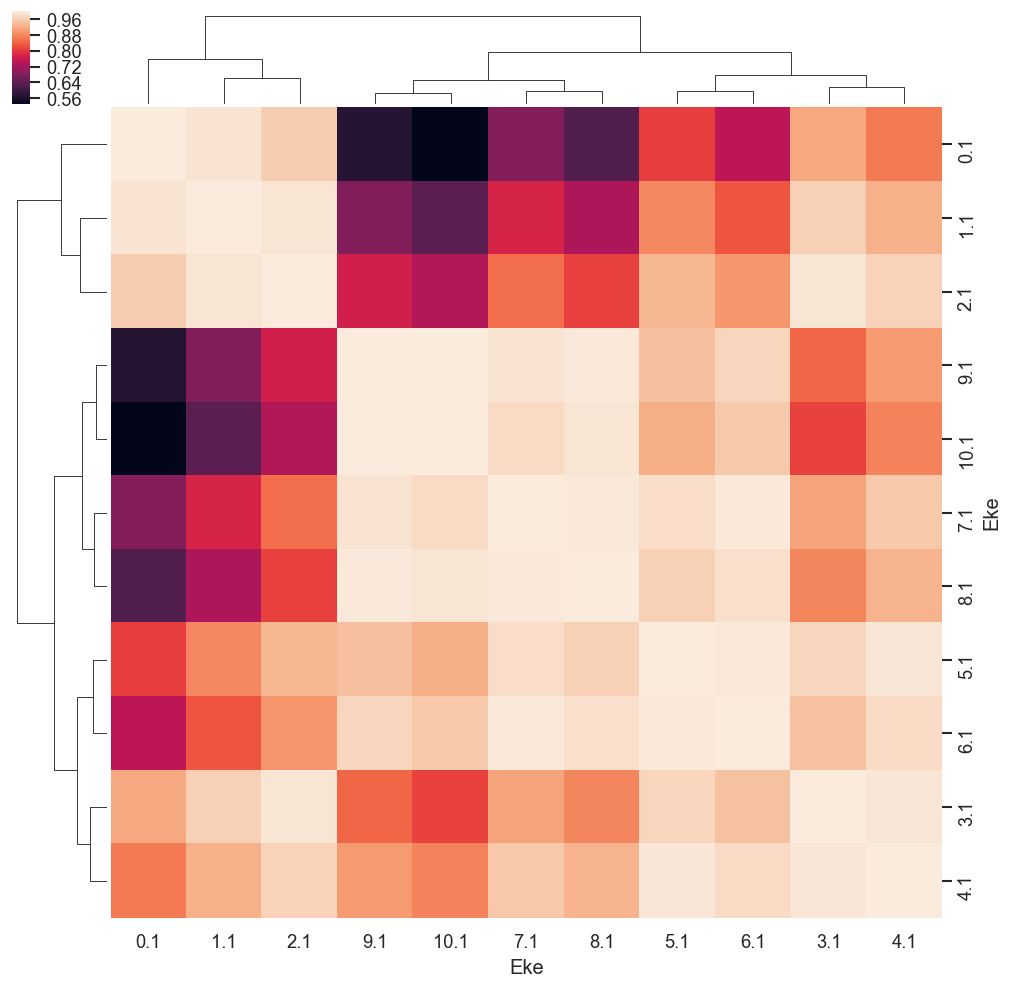

In [20]:
# Eke correlations
ep.snsMatMod.clustermap(daPlotpd.iloc[:,0:11].corr())

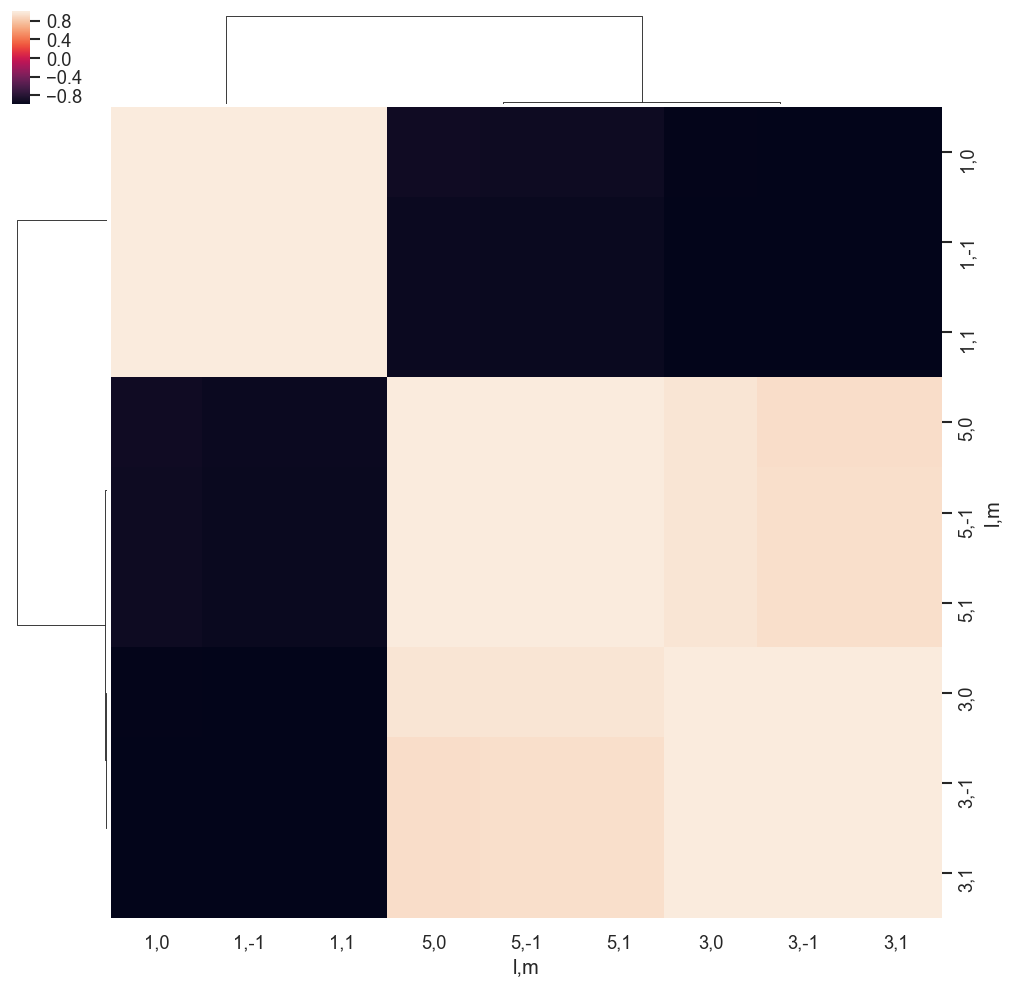

In [21]:
# (l,m) correlations
ep.snsMatMod.clustermap(daPlotpd.iloc[:,0:11].T.corr())

### Phase correlations
- Full phases and correlations...

Plotting data n2_3sg_0.1-50.1eV_A2.inp.out, pType=phase, thres=0.5, with Seaborn


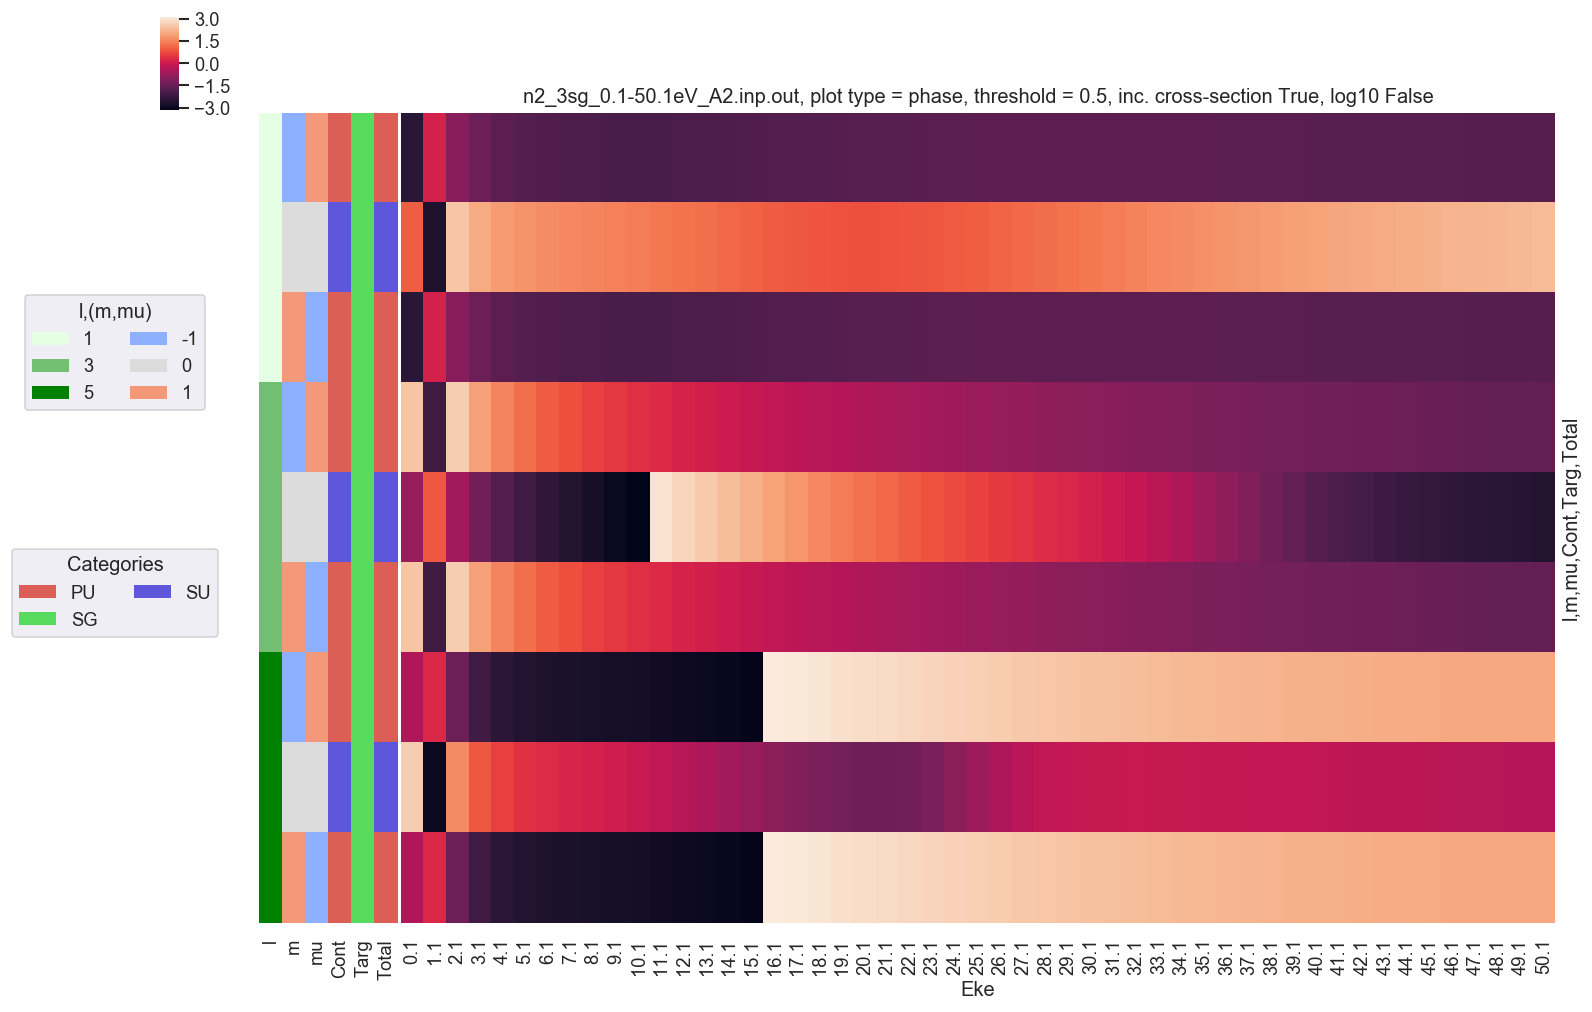

In [22]:
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(dataSet[0], selDims = {'Type':'L'}, 
                                               plotDims = ('l','m','mu','Cont','Targ','Total'), 
                                               thres = 0.5, figsize = (15,10), 
                                               pType = 'phase')

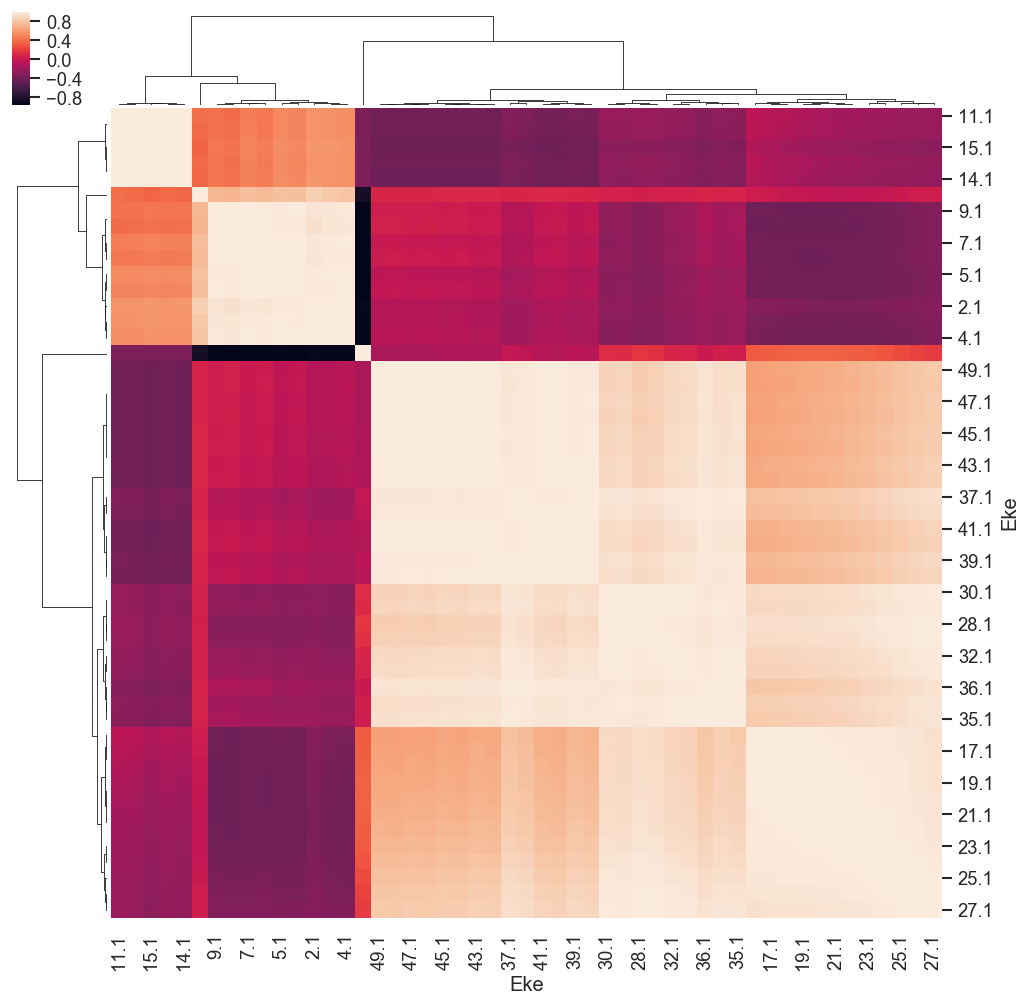

In [23]:
# ep.snsMatMod.clustermap(daPlotpd.iloc[:,0:11].corr())
ep.snsMatMod.clustermap(daPlotpd.corr())

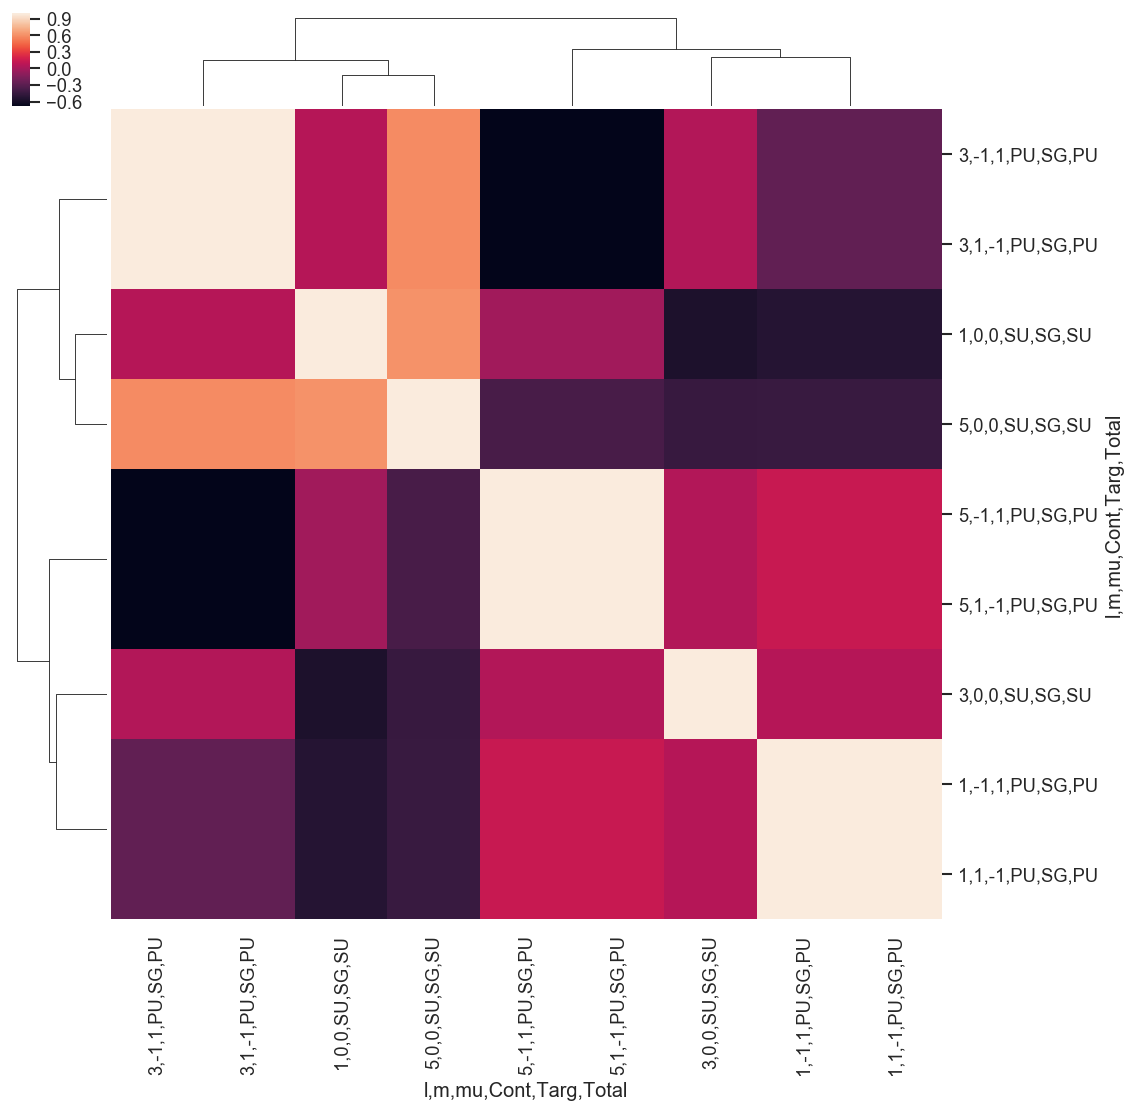

In [24]:
# ep.snsMatMod.clustermap(daPlotpd.iloc[:,0:11].T.corr())
ep.snsMatMod.clustermap(daPlotpd.T.corr())

## For $\beta_{L,M}$

The same functionality can be applied to plotting $\beta_{L,M}$ paramters... 

(For calculation details, see [$\beta_{L,M}$ calculations demo notebook](https://github.com/phockett/ePSproc/blob/master/epsproc/tests/ePSproc_BLM_calc_demo_Sept2019.ipynb).)

In [25]:
daIn = dataSet[0].copy()
BLMXeN2 = ep.mfblm(daIn, selDims = {'Type':'L'}, thres = 1e-2, verbose = 0)   # Run for all Eke

Plotting data n2_3sg_0.1-50.1eV_A2.inp.out, pType=a, thres=0.01, with Seaborn


No handles with labels found to put in legend.


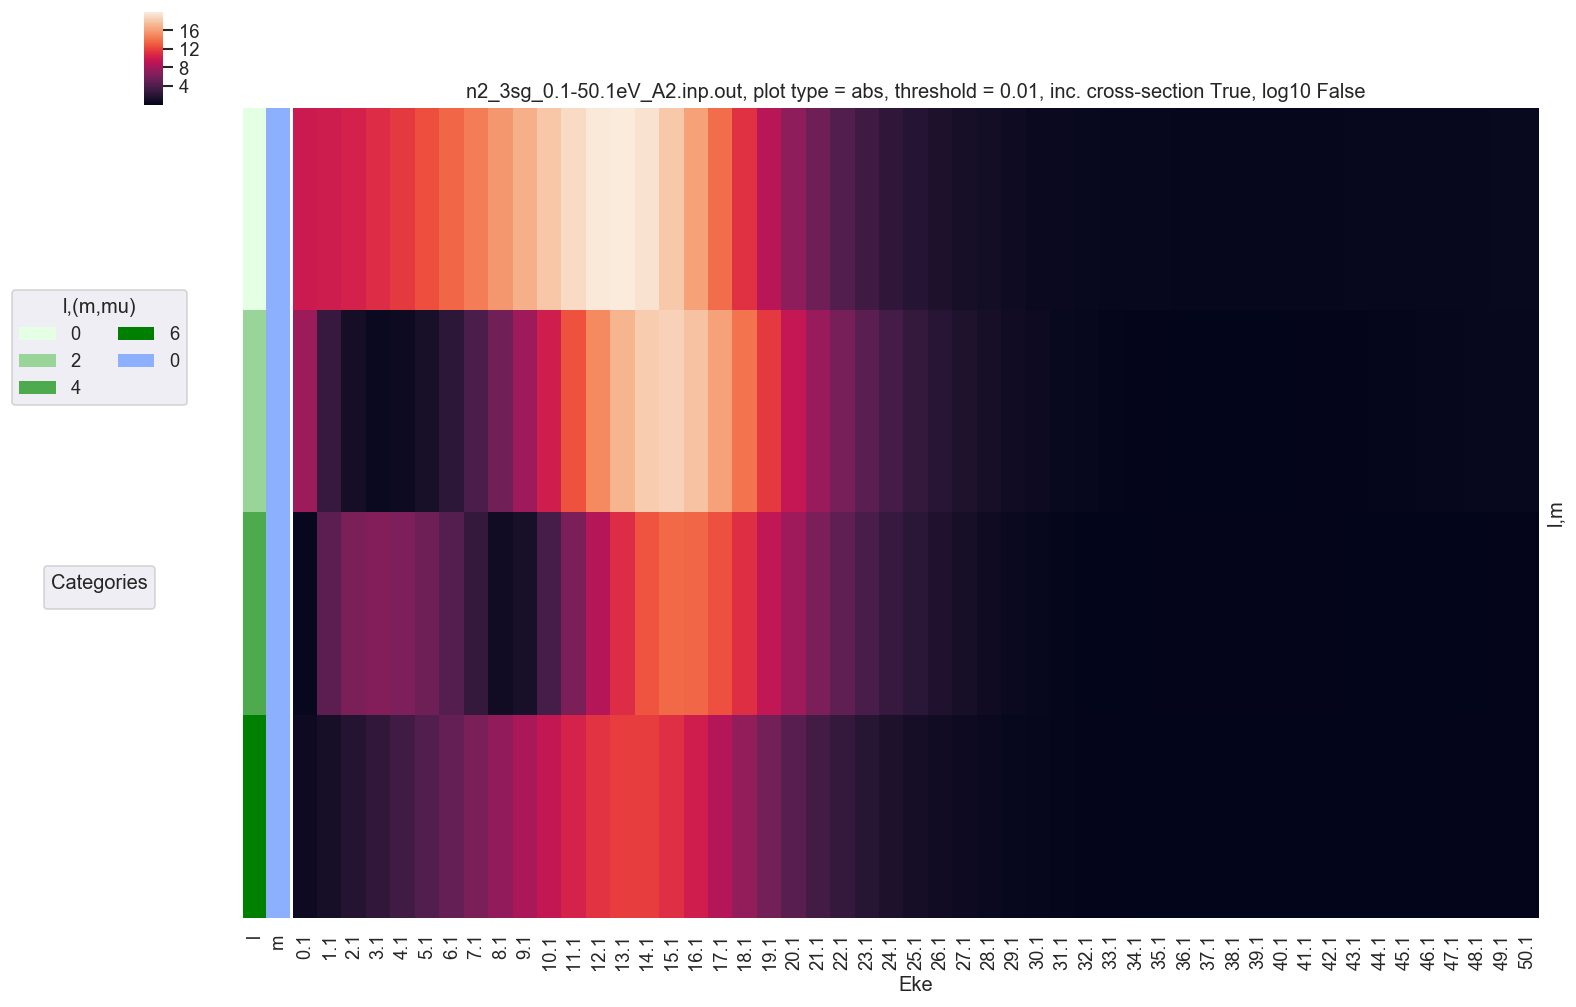

In [26]:
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(BLMXeN2, SFflag = True,
                                               plotDims = ('l','m'), 
                                               figsize = (15,10))

---
- $\beta_{L,M}$ correlations over Eke

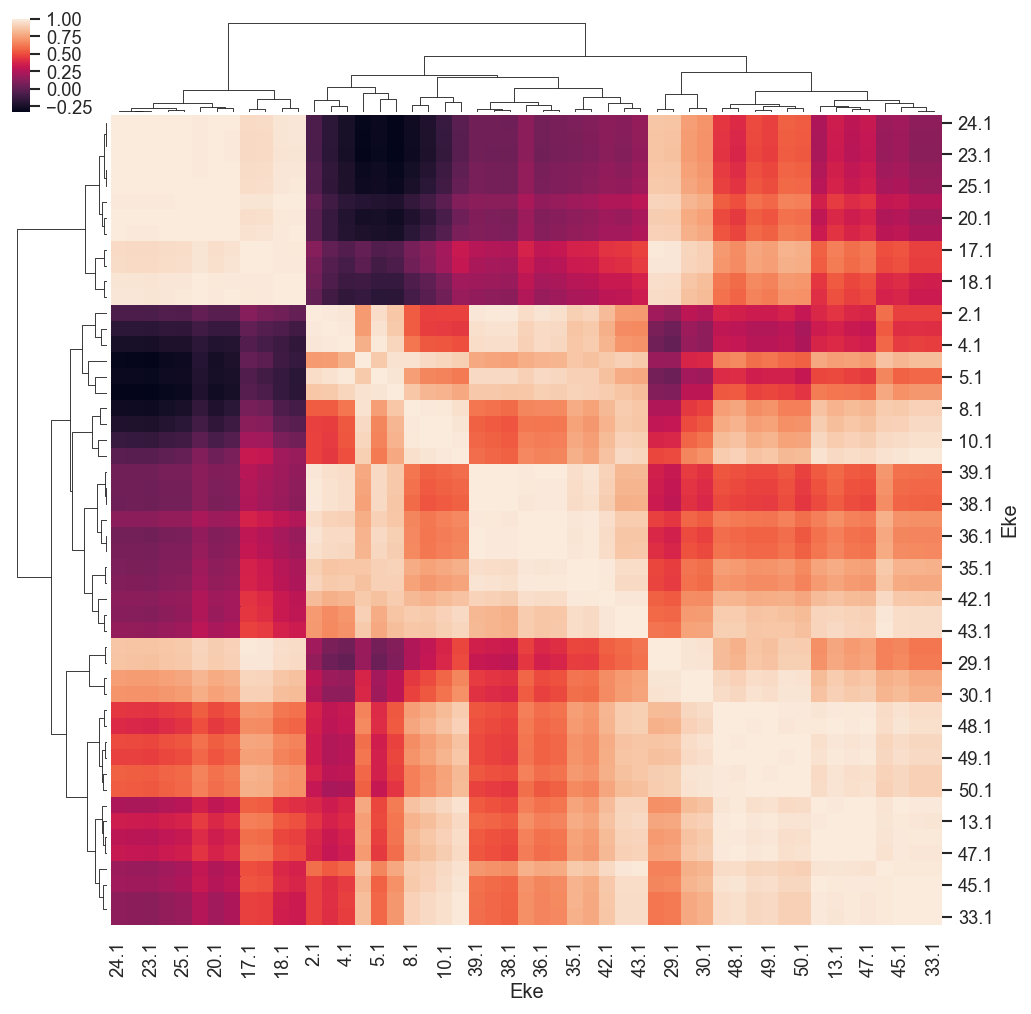

In [27]:
ep.snsMatMod.clustermap(daPlotpd.corr())

---
For the $\beta_{L,M}$ case, the SFflag controls whether normalised or unnormalised values are plotted. In the former case, the cross-section ($\beta_{0,0}$) is divided out, hence $\beta_{0,0}$ = 1.

Plotting data n2_3sg_0.1-50.1eV_A2.inp.out, pType=a, thres=0.01, with Seaborn


No handles with labels found to put in legend.


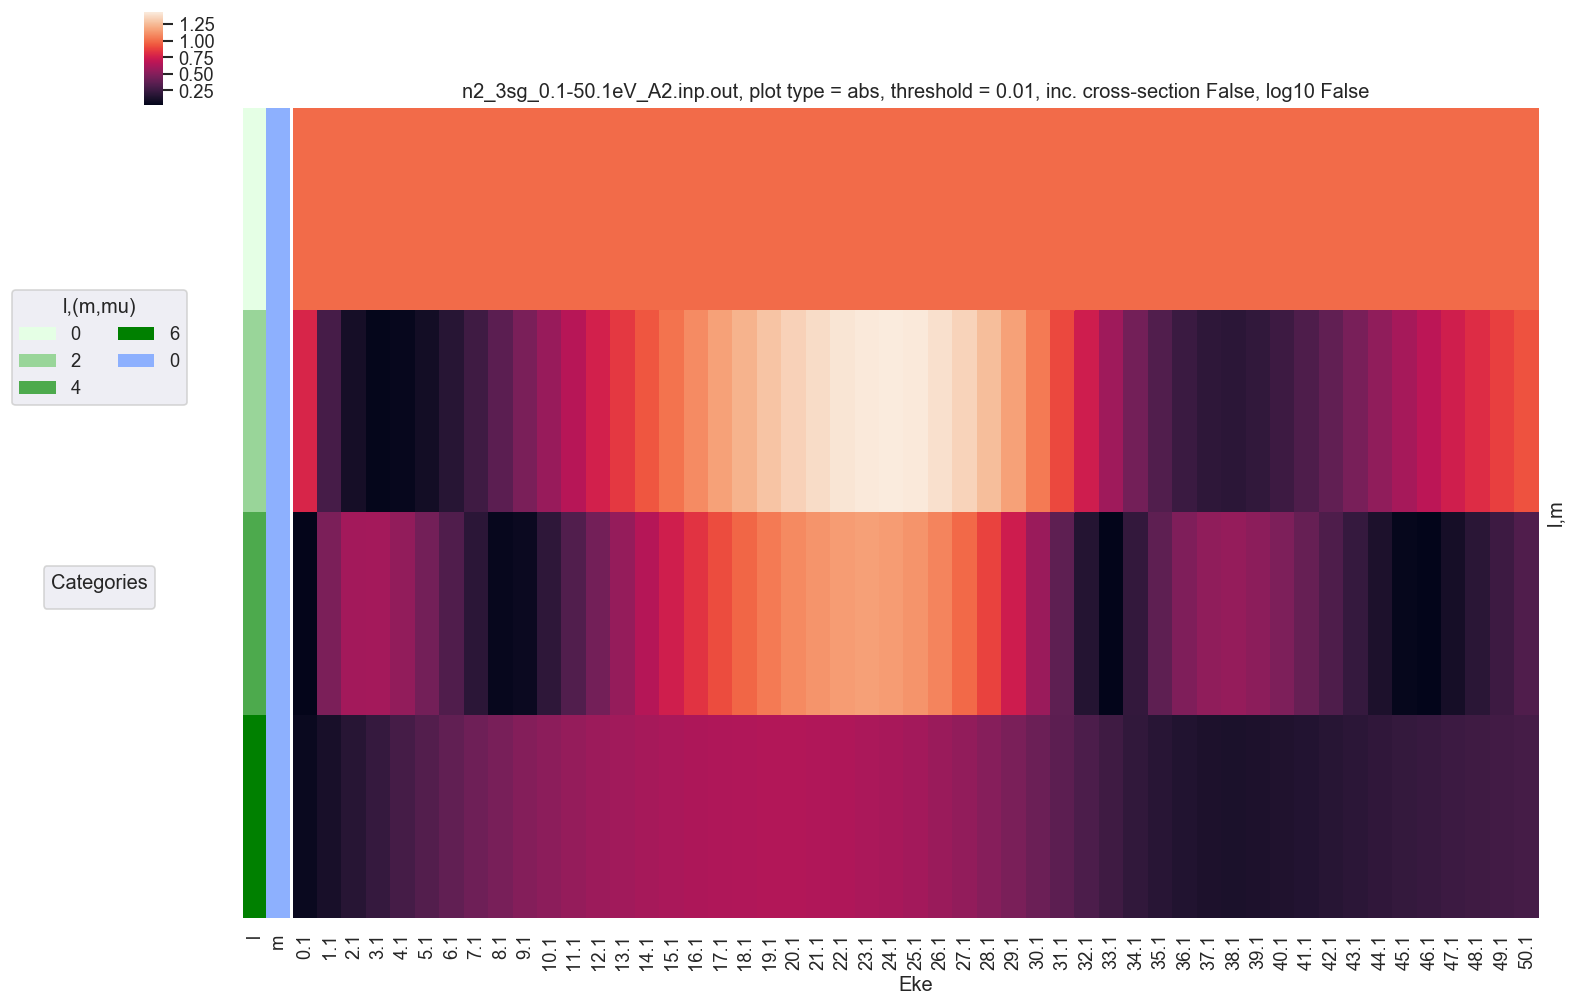

In [28]:
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(BLMXeN2, SFflag = False,
                                               plotDims = ('l','m'), 
                                               figsize = (15,10))

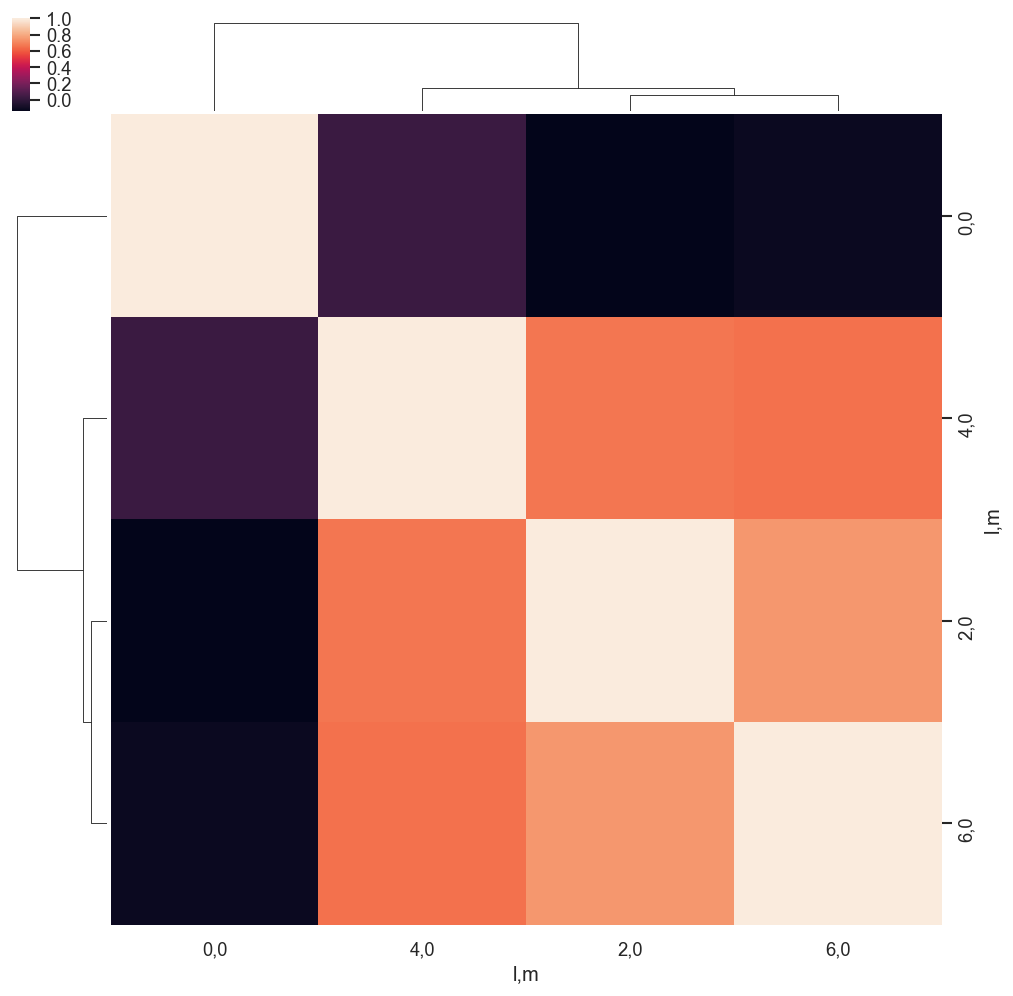

In [29]:
ep.snsMatMod.clustermap(daPlotpd.T.corr())

---
As a function of Euler angle...

In [30]:
# Set pol geoms - these correspond to (z,x,y) in molecular frame (relative to principle/symmetry axis)
pRot = [0, 0, np.pi/2]
tRot = [0, np.pi/2, np.pi/2]
cRot = [0, 0, 0]
eAngs = np.array([pRot, tRot, cRot]).T   # List form to use later, rows per set of angles

In [31]:
thres = 1e-2
# Calculate for each pol geom
# Run for all Eke, selected gauge only; round angles for display purposes only (to be fixed!)
BLMeuler = ep.mfblmEuler(daIn, selDims = {'Type':'L'}, eAngs = np.round(eAngs,3), thres = thres, verbose = 0)

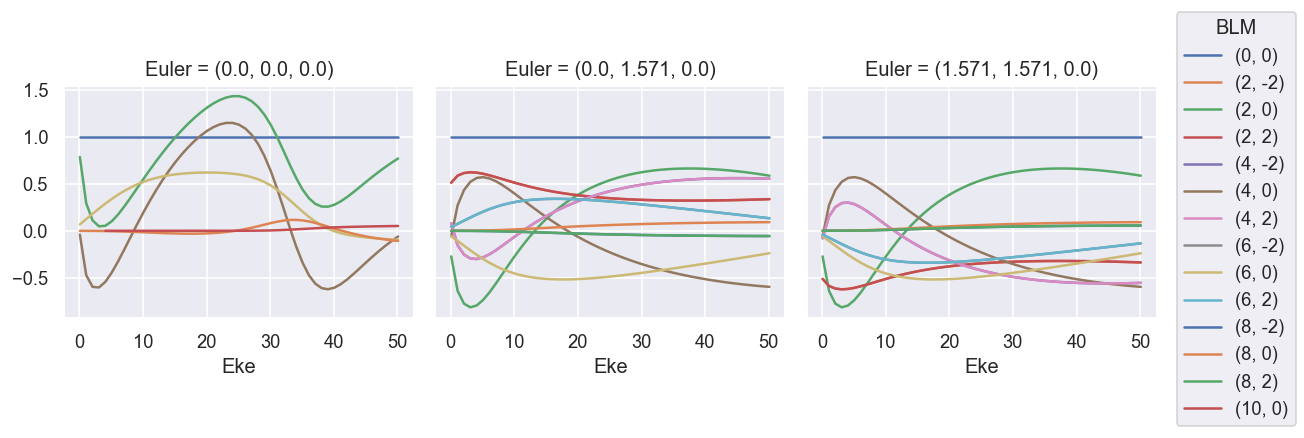

In [32]:
# Plot results - basic with Xarray (note Seaborn style may now be applied, since lmPlot() sets this globally)
BLMplot = ep.matEleSelector(BLMeuler, thres=thres, dims = 'Eke')
BLMplot.real.squeeze().plot.line(x='Eke', col='Euler');

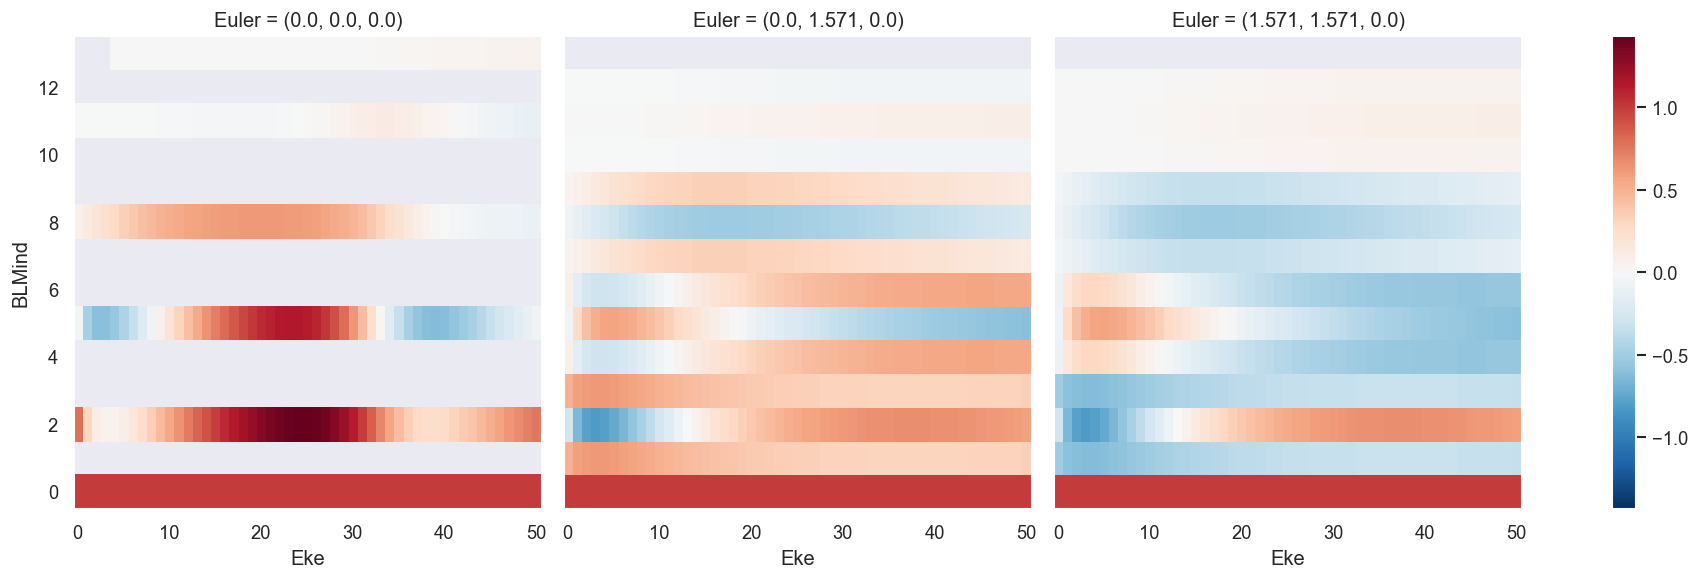

In [33]:
# Plot resutls - 2D maps with Xarray, faceted on Euler angle sets
# Set BLM index for y-axis
BLMplot['BLMind'] = ('BLM',np.arange(0, BLMplot.BLM.size))
# Plot
BLMplot.real.squeeze().plot(x='Eke', y='BLMind', col='Euler', size = 5);

Plotting data n2_3sg_0.1-50.1eV_A2.inp.out, pType=a, thres=0.01, with Seaborn


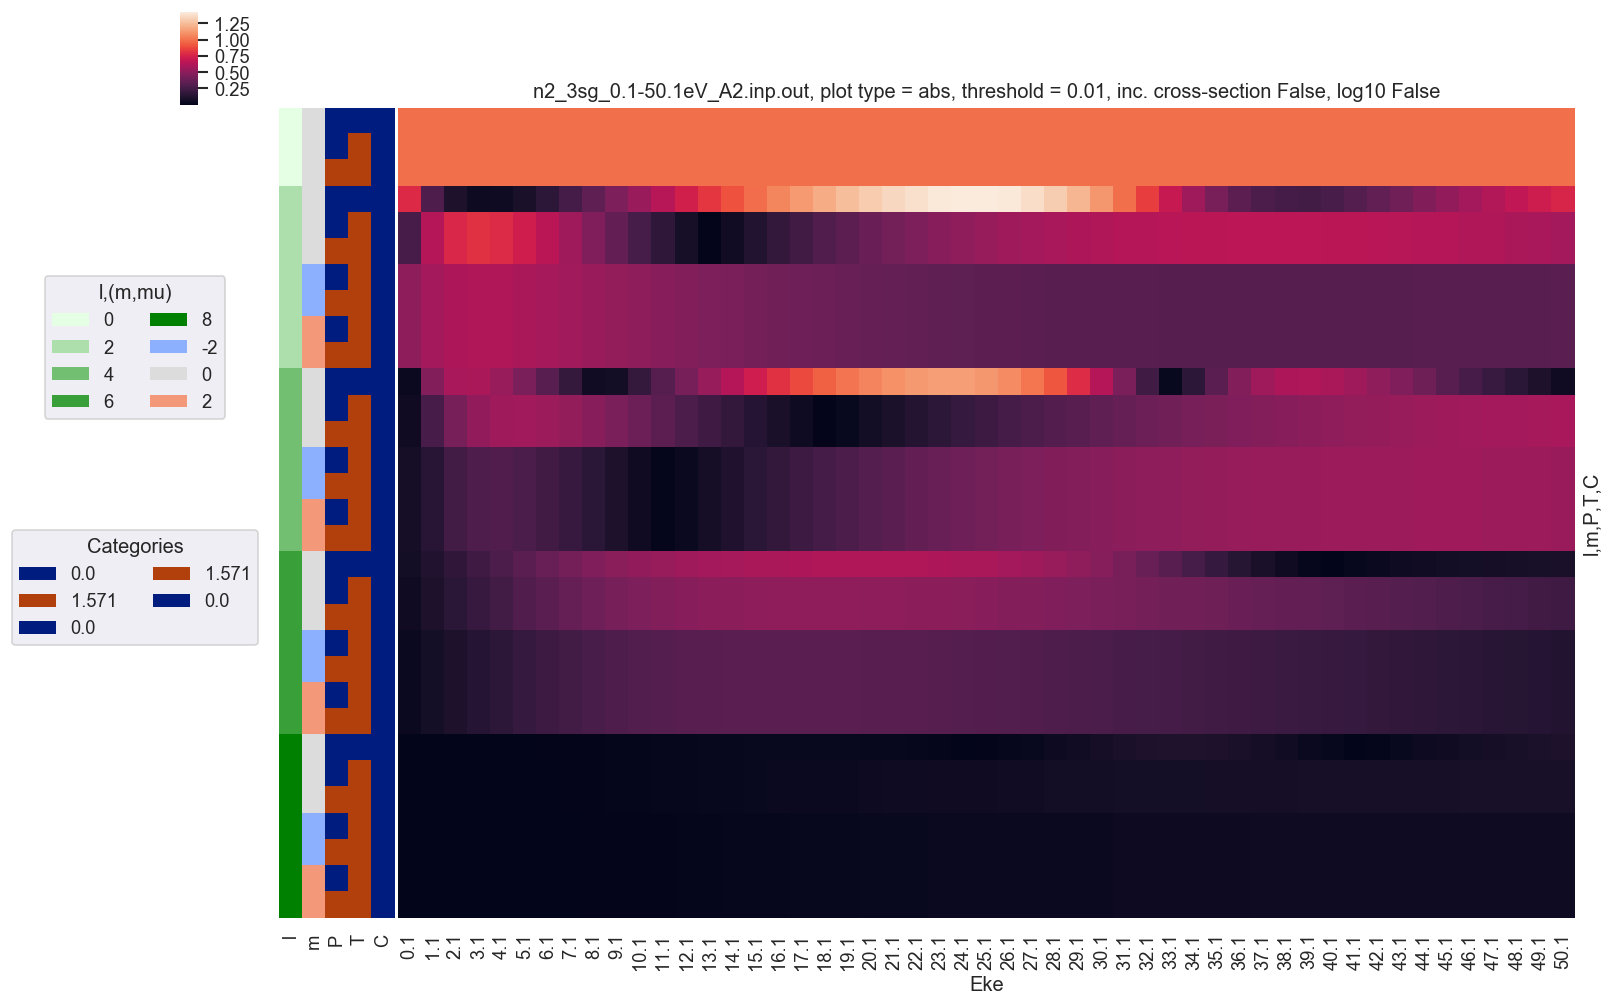

In [34]:
# Plot results with lmPlot()
# NOTE - this currently plots with unstacked Euler angles (P,T,C) - should change to treat these as a stacked set.
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(BLMeuler, SFflag = False,
                                               plotDims = ('l','m','P','T','C'), 
                                               figsize = (15,10))

In [35]:
daPlotpd

Eke                       0.1       1.1       2.1       3.1       4.1   \
l m  P     T     C                                                       
0  0 0.000 0.000 0.0  1.000000  1.000000  1.000000  1.000000  1.000000   
           1.571 0.0  1.000000  1.000000  1.000000  1.000000  1.000000   
     1.571 1.571 0.0  1.000000  1.000000  1.000000  1.000000  1.000000   
2  0 0.000 0.000 0.0  0.784764  0.292636  0.110283  0.047649  0.053342   
           1.571 0.0  0.272712  0.638477  0.775003  0.814436  0.794373   
     1.571 1.571 0.0  0.272712  0.638474  0.775003  0.814436  0.794373   
  -2 0.000 1.571 0.0  0.512102  0.586764  0.614632  0.622681  0.618586   
     1.571 1.571 0.0  0.512102  0.586763  0.614632  0.622681  0.618586   
   2 0.000 1.571 0.0  0.512102  0.586764  0.614632  0.622681  0.618586   
     1.571 1.571 0.0  0.512102  0.586763  0.614632  0.622681  0.618586   
4  0 0.000 0.000 0.0  0.040643  0.472501  0.596722  0.603029  0.543447   
           1.571 0.0  0.059474  0.271210  0.432963  0.521251  0.562304   
     1.571 1.571 0.0  0.059474  0.271210  0.432965  0.521255  0.562304   
  -2 0.000 1.571 0.0  0.080503  0.153386  0.252808  0.294668  0.300556   
     1.571 1.571 0.0  0.080503  0.153385  0.252807  0.294668  0.300556   
   2 0.000 1.571 0.0  0.080503  0.153386  0.252808  0.294668  0.300556   
     1.571 1.571 0.0  0.080503  0.153385  0.252807  0.294668  0.300556   
6  0 0.000 0.000 0.0  0.067994  0.124572  0.181052  0.236262  0.289119   
           1.571 0.0  0.058947  0.107796  0.158151  0.207777  0.255308   
     1.571 1.571 0.0  0.058947  0.107795  0.158150  0.207775  0.255306   
  -2 0.000 1.571 0.0  0.040202  0.073400  0.107659  0.141364  0.173538   
     1.571 1.571 0.0  0.040202  0.073401  0.107660  0.141364  0.173538   
   2 0.000 1.571 0.0  0.040202  0.073400  0.107659  0.141364  0.173538   
     1.571 1.571 0.0  0.040202  0.073401  0.107660  0.141364  0.173538   
8  0 0.000 0.000 0.0  0.000242  0.000798  0.001234  0.001876  0.002845   
           1.571 0.0  0.000184  0.000658  0.001044  0.001589  0.002410   
     1.571 1.571 0.0  0.000184  0.000657  0.001043  0.001588  0.002408   
  -2 0.000 1.571 0.0  0.000117  0.000417  0.000662  0.001005  0.001524   
     1.571 1.571 0.0  0.000117  0.000416  0.000660  0.001005  0.001524   
   2 0.000 1.571 0.0  0.000117  0.000417  0.000662  0.001005  0.001524   
     1.571 1.571 0.0  0.000117  0.000416  0.000660  0.001005  0.001524   

Eke                       5.1       6.1       7.1       8.1       9.1   ...  \
l m  P     T     C                                                      ...   
0  0 0.000 0.000 0.0  1.000000  1.000000  1.000000  1.000000  1.000000  ...   
           1.571 0.0  1.000000  1.000000  1.000000  1.000000  1.000000  ...   
     1.571 1.571 0.0  1.000000  1.000000  1.000000  1.000000  1.000000  ...   
2  0 0.000 0.000 0.0  0.100478  0.172894  0.260213  0.355479  0.453966  ...   
           1.571 0.0  0.736632  0.655846  0.562321  0.463340  0.363902  ...   
     1.571 1.571 0.0  0.736632  0.655846  0.562321  0.463340  0.363902  ...   
  -2 0.000 1.571 0.0  0.606800  0.590309  0.571219  0.551014  0.530717  ...   
     1.571 1.571 0.0  0.606800  0.590309  0.571219  0.551014  0.530717  ...   
   2 0.000 1.571 0.0  0.606800  0.590309  0.571219  0.551014  0.530717  ...   
     1.571 1.571 0.0  0.606800  0.590309  0.571219  0.551014  0.530717  ...   
4  0 0.000 0.000 0.0  0.445622  0.326258  0.196174  0.062553  0.069806  ...   
           1.571 0.0  0.570964  0.557120  0.527849  0.488365  0.442509  ...   
     1.571 1.571 0.0  0.570964  0.557120  0.527849  0.488365  0.442509  ...   
  -2 0.000 1.571 0.0  0.282880  0.249939  0.207617  0.160136  0.110478  ...   
     1.571 1.571 0.0  0.282880  0.249939  0.207617  0.160136  0.110478  ...   
   2 0.000 1.571 0.0  0.282880  0.249939  0.207617  0.160136  0.110478  ...   
     1.571 1.571 0.0  0.282880  0.249939  0.207617  0.160136  0.110478  ...   
6  0 0.000 0.000 0.0  0.338694  0.384313  0.425486  0.46

---
- Look at correlations over all (l,m,Euler)

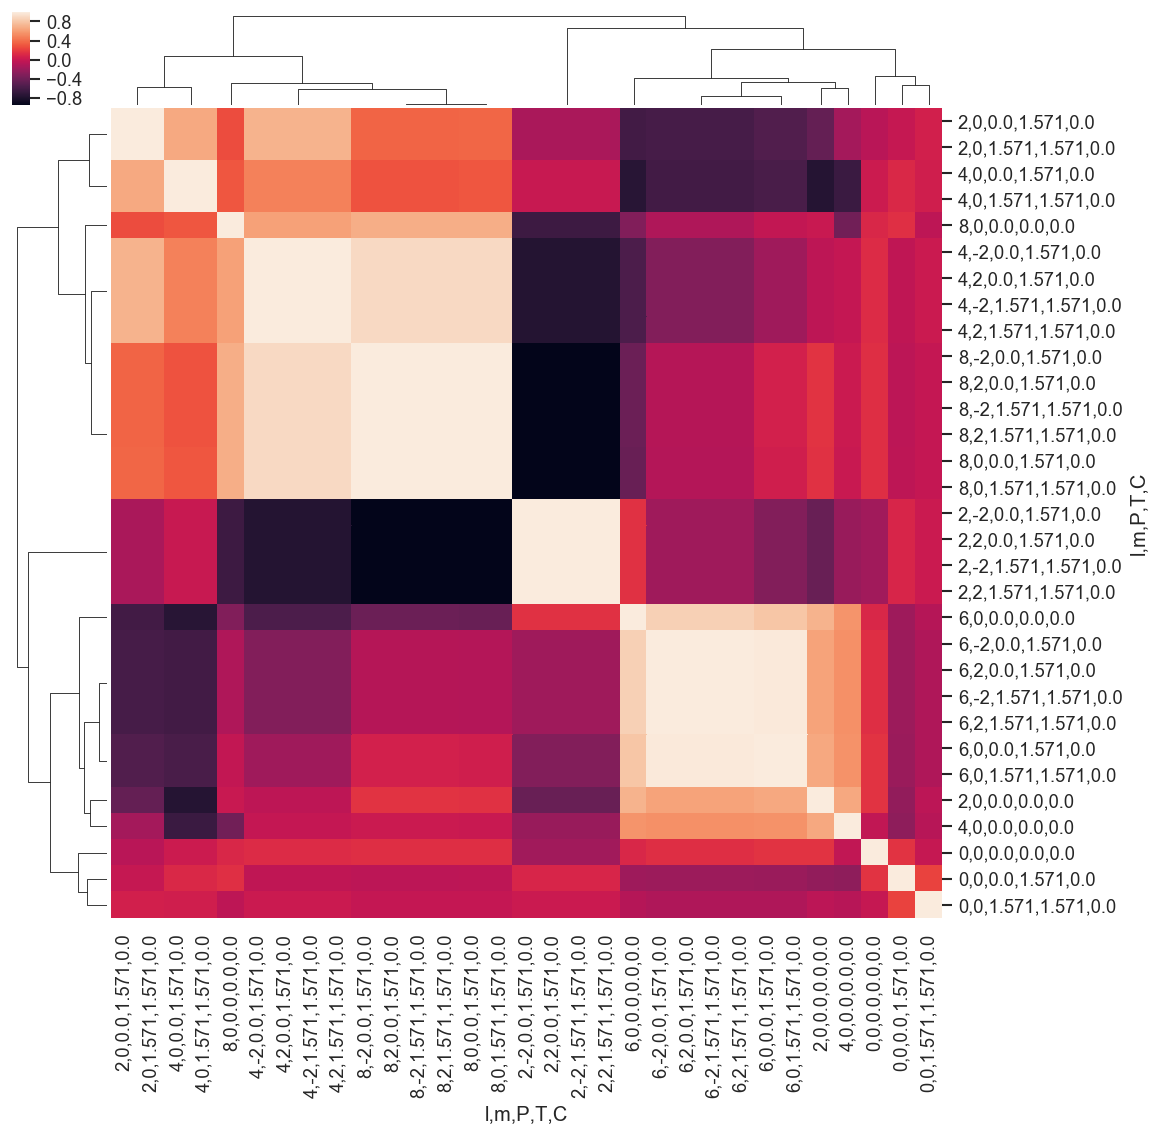

In [36]:
ep.snsMatMod.clustermap(daPlotpd.T.corr())

---
- Replot with sorting by Euler sets

Plotting data n2_3sg_0.1-50.1eV_A2.inp.out, pType=a, thres=0.01, with Seaborn


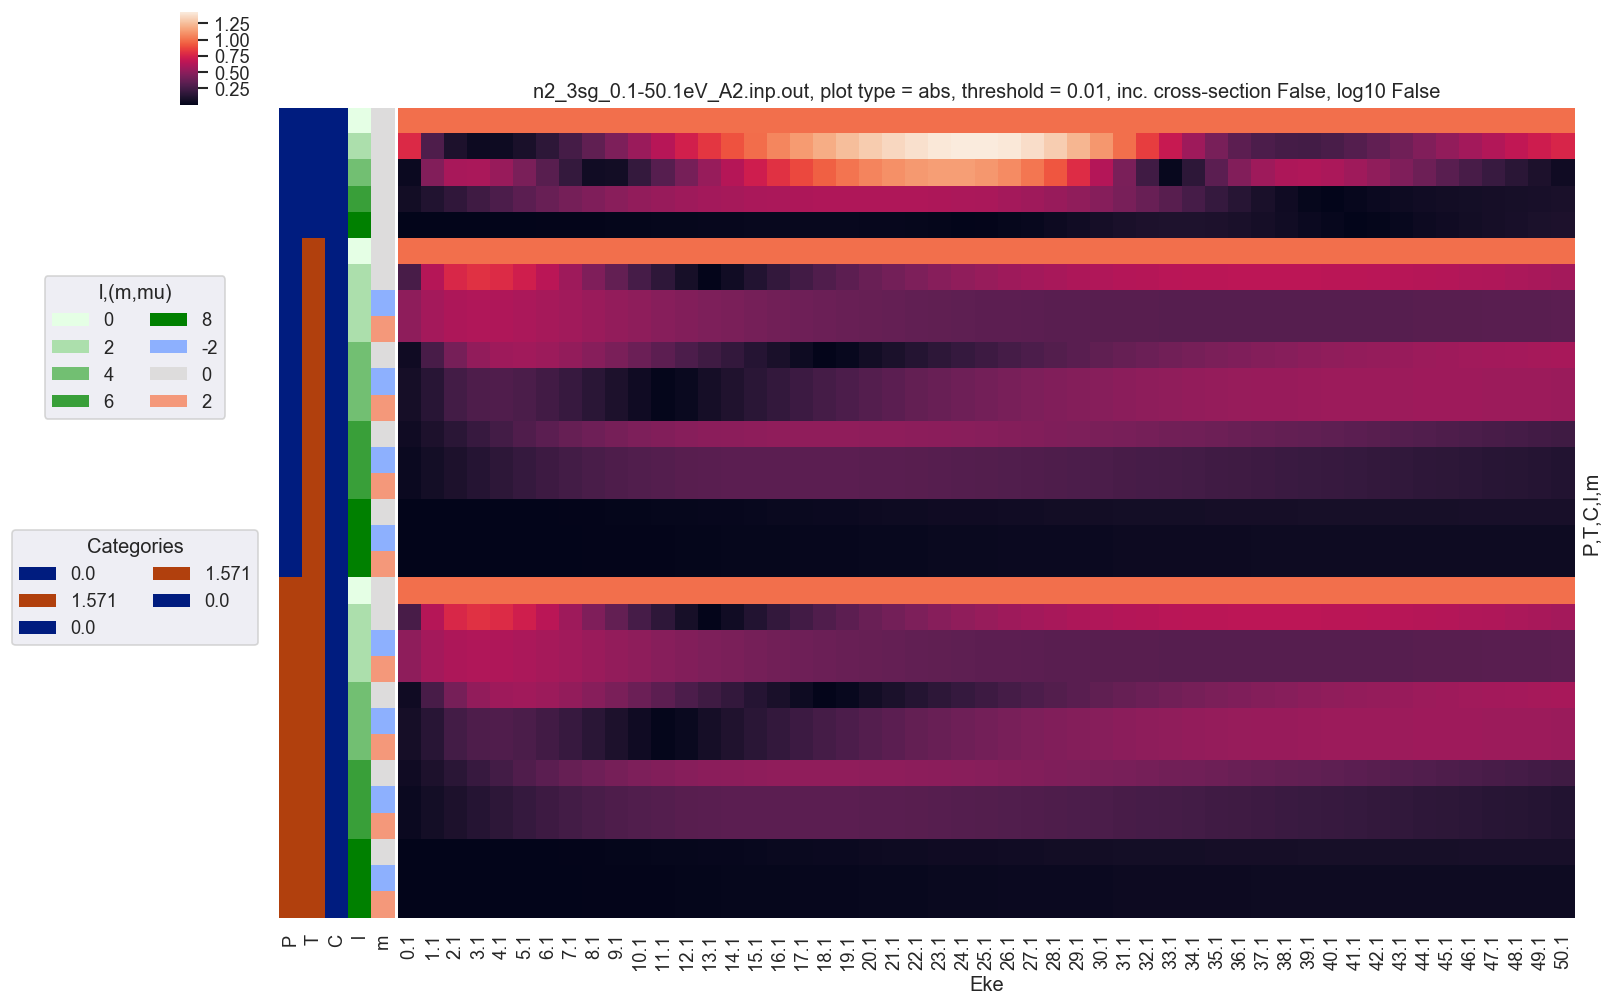

In [39]:
# Plot results with lmPlot(), ordering by Euler sets
# NOTE - this currently plots with unstacked Euler angles (P,T,C) - should change to treat these as a stacked set.
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(BLMeuler, SFflag = False,
                                               plotDims = ('P','T','C','l','m'), 
                                               figsize = (15,10))

... and including cross-section ...

(Possible issue here...? TBC)

Plotting data n2_3sg_0.1-50.1eV_A2.inp.out, pType=a, thres=0.01, with Seaborn


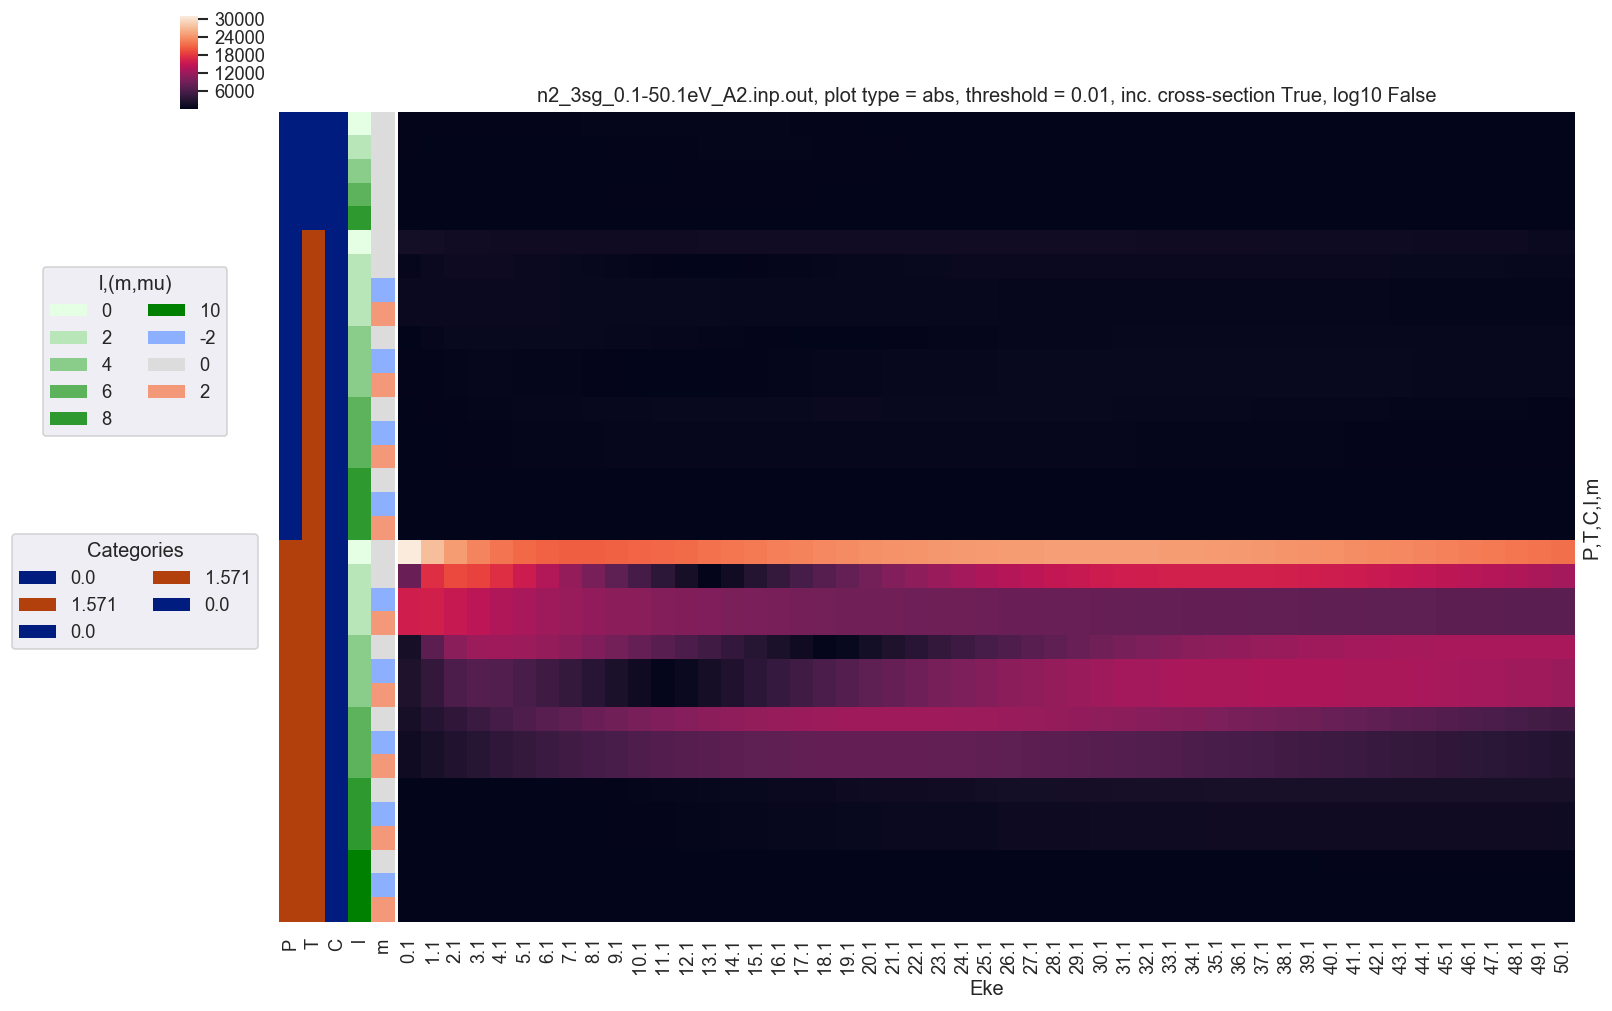

In [40]:
# Plot results with lmPlot(), ordering by Euler sets + use XS
# NOTE - this currently plots with unstacked Euler angles (P,T,C) - should change to treat these as a stacked set.
daPlot, daPlotpd, legendList, gFig = ep.lmPlot(BLMeuler, SFflag = True,
                                               plotDims = ('P','T','C','l','m'), 
                                               figsize = (15,10))